<a href="https://colab.research.google.com/github/mansi-guptaa/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Email Campaign Effectiveness Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Mansi Gupta


# **Project Summary**

Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.


This project aims to develop a robust machine learning model to predict email campaign effectiveness for small to medium businesses (SMBs). The goal is to classify emails into three categories - **ignored, read, or acknowledged**- enabling businesses to optimize their email strategies and improve customer engagement.

The project leverages a dataset containing various email features such as email type, subject hotness score, source, campaign type, customer location, time sent, word count, number of links and images, and the email status (target variable).

The process involves:

**Data Wrangling:**
Handling missing values in features like 'Customer_Location', 'Total_Past_Communications', 'Total_Links', and 'Total_Images'.
Assessing feature relevance using statistical techniques like Cramer's V to identify and potentially drop less impactful features (e.g., 'Customer_Location').

**Exploratory Data Analysis (EDA):**
Univariate, bivariate, and multivariate analysis to uncover patterns and relationships between variables.
Visualizations (e.g., bar charts, histograms, scatter plots) to gain insights and communicate findings.

**Feature Engineering:**
Potentially creating new features or transforming existing ones to improve model performance.

**Model Selection and Development:**
Exploring various machine learning algorithms suitable for classification tasks, such as:
* K-Nearest Neighbors (KNN)
* Decision Trees
* Random Forests
* Gradient Boosting (e.g., CatBoost, XGBoost)

**Model Evaluation and Tuning:**
Employing evaluation metrics like **accuracy, precision, recall, F1-score, and ROC-AUC** to assess model performance.
Utilizing cross-validation and hyperparameter tuning techniques (e.g., **RandomizedSearchCV**) to optimize model parameters.

**Deployment:**
Preparing the model for deployment using libraries like **'joblib'** to enable real-time predictions.
By following these steps, the project aims to deliver a practical solution for SMBs to enhance their email marketing effectiveness and achieve better business outcomes.



# **GitHub Link -**

https://github.com/mansi-guptaa/Email-Campaign-Effectiveness-Prediction

# **Problem Statement**


Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [91]:
# Import Libraries
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score

# Data Balancing
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Feature Selection
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest

# Machine Learning and Model Building
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
!pip install catboost
from catboost import CatBoostClassifier, Pool
import xgboost as xgb

# Model Evaluation
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score,roc_curve, classification_report

# Statistical Distributions
import scipy.stats as stats
from scipy.stats import uniform, randint

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Statistical Analysis
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Deployment
!pip install joblib
from joblib import dump, load


### Dataset Loading

In [92]:
# Load Dataset
intial_email_df= pd.read_csv('https://raw.githubusercontent.com/mansi-guptaa/Email-Campaign-Effectiveness-Prediction/main/Data/data_email_campaign.csv')

### Dataset First View

In [93]:
# Dataset First Look
intial_email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


### Dataset Rows & Columns count

In [94]:
# Dataset Rows & Columns count
intial_email_df.shape

(68353, 12)

### Dataset Information

In [95]:
# Dataset Info
intial_email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


#### Duplicate Values

In [96]:
# Dataset Duplicate Value Count
intial_email_df.duplicated().sum()

0

#### Missing Values/Null Values

In [97]:
# Missing Values/Null Values Count
intial_email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

<Axes: >

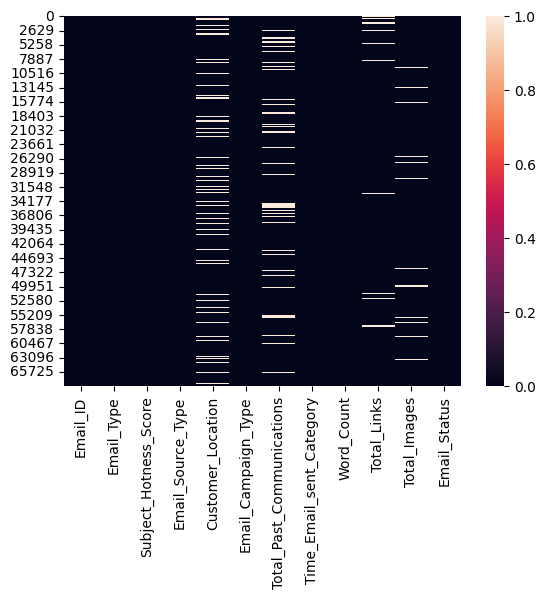

In [98]:
# Visualizing the missing values
sns.heatmap(intial_email_df.isnull())

### What did you know about your dataset?



*  The dataset have 12 columns and 68352 rows. Out of 12 columns 6 are categorical
  1.   Email_Type
  2.   Email_Source_Type
  3.   Customer_Location
  4.   Email_Campaign_Type
  5.   Time_Email_sent_Category
  6.   Email_Status and rest are continous.


*  There are no duplicate values
*  There are missing values in columns:

  1.   Customer_Location            
  2.   Total_Past_Communications
  3.   Total_Links
  4.   Total_Images









## ***2. Understanding Your Variables***

In [99]:
# Dataset Columns
intial_email_df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [100]:
# Dataset Describe
intial_email_df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


### Variables Description

Email ID: Email ID of the customer.

Email type: There are two categories: 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.

Subject Hotness Score: It is the email's subject score on the basis of how good and effective the content is.

Email Source: It represents the source of the email like sales and marketing or important admin mails related to the product.

Email Campaign Type: The campaign type of the email.

Total Past Communications: This column contains the total previous mails from the same source, the number of communications had.

Customer Location: Contains demographical data of the customer, the location where the customer resides.

Time Email sent Category: It has three categories: 1, 2, and 3; the time of the day when the email was sent, we can think of it as morning, evening, and night time slots.

Word Count: The number of words contained in the email.

Total Links: Number of links in the email.

Total Images: Number of images in the email.

Email Status: Our target variable which contains whether the mail was ignored, read, or acknowledged by the reader.




### Check Unique Values for each variable.

In [101]:
# Check Unique Values for each variable.
for i in intial_email_df.columns:
  print("Number of unique values in", i ,"is :", intial_email_df[i].nunique())

Number of unique values in Email_ID is : 68353
Number of unique values in Email_Type is : 2
Number of unique values in Subject_Hotness_Score is : 51
Number of unique values in Email_Source_Type is : 2
Number of unique values in Customer_Location is : 7
Number of unique values in Email_Campaign_Type is : 3
Number of unique values in Total_Past_Communications is : 64
Number of unique values in Time_Email_sent_Category is : 3
Number of unique values in Word_Count is : 151
Number of unique values in Total_Links is : 37
Number of unique values in Total_Images is : 45
Number of unique values in Email_Status is : 3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [102]:
email_df = intial_email_df.copy()

In [103]:
# Checking the relevance of Customer_Location columns
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

# Calculate Cramér's V
cramers_v_value = cramers_v(email_df['Customer_Location'], email_df['Email_Status'])
print(f"Cramér's V: {cramers_v_value}")


Cramér's V: 0.009869399606367879


In [104]:
email_df.drop(['Customer_Location', 'Email_ID'], axis  = 1,  inplace = True)

### What all manipulations have you done and insights you found?


*   Created a copy of the dataset to do the further analysis. This would keep intact the original nature of dataset
*   Checked the relevance of Customer_Location variable by using crammer's rule. Since the crammer value is significantly less, it signifies that the Customer_Location variable has a very weak or negligible association with Email Status our dependent variable.
* Email_ID contain all unique values so it would not be required for further analysis and prediction. Thus dropped the Customer_Location and Email_ID column.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Creating a general purpose function for evaluation report**

In [105]:
# code for showing bar percentage
def barPerc(df,column,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        column : (string) X variable
        ax: Axes object (for Seaborn Countplot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[column].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 7 X categories, 3 hues =>
        ##    [0, 8, 16] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        # if total > 0:
        for bar in hueBars:
              if bar.get_height() > 0:  # Skip bars with zero height
                percentage = bar.get_height() / total
                ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")


#### Chart - 1 - Email Status

Number of emails ignores: 54941
Number of emails read  : 11039
Number of emails acknowledged   : 2373


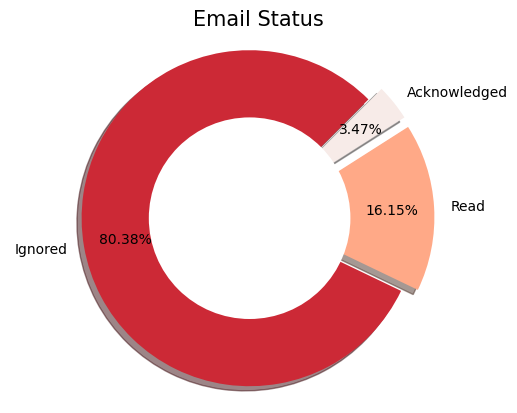

In [106]:
# Chart - 1 visualization code
print(f'Number of emails ignores: {email_df["Email_Status"].value_counts()[0]}')
print(f'Number of emails read  : {email_df["Email_Status"].value_counts()[1]}')
print(f'Number of emails acknowledged   : {email_df["Email_Status"].value_counts()[2]}')

color = ['#cc2936', "#ffa987", '#f7ebe8']
explode = (0, 0.1, 0.1 )

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(email_df["Email_Status"].value_counts(), explode=explode, labels=["Ignored", "Read", "Acknowledged"], colors = color,
        autopct='%1.2f%%', startangle=45, shadow = True,  pctdistance=0.75)

# Draw a circle at the center with radius 0.60 to make it a donut chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Add a title
plt.title('Email Status', fontsize = 15)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

The reasons for using a donut chart is clear Proportional Representation, visual Appeal, categorical Focus

##### 2. What is/are the insight(s) found from the chart?



*   High Ignorance Rate: Most emails (54,941) are ignored, indicating high disengagement.
*   Moderate Read Rate: Fewer emails (11,039) are read, suggesting they are noticed but not compelling enough for further action.
*   Low Acknowledgement Rate: Very few emails (2,373) are acknowledged, implying minimal recipient response or action.
* This shows that dataset is **IMBALANCED**






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can significantly help in creating a positive business impact if acted upon correctly.Identifying that most emails are ignored allows you to revamp your email strategy. This could involve improving subject lines, personalizing content, or changing the timing of emails.

However, ignoring these insights or failing to address the underlying issues can lead to negative growth due to decreased email effectiveness and potential damage to brand reputation.

#### Chart - 2 - Percentage Distribution of Email Types

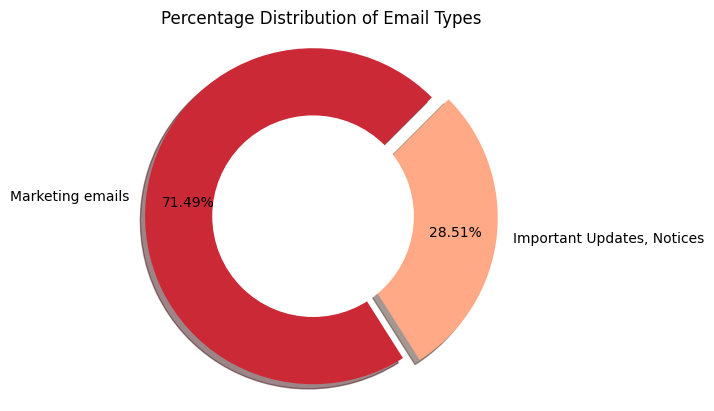

In [107]:
# Chart - 2 visualization code
explode = (0, 0.1)
color = ['#cc2936', "#ffa987"]

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(email_df["Email_Type"].value_counts(), explode=explode, labels=['Marketing emails', 'Important Updates, Notices'], colors  = color,
        autopct='%1.2f%%', startangle=45, shadow = True,  pctdistance=0.75)

# Draw a circle at the center with radius 0.60 to make it a donut chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
# Add a title
plt.title('Percentage Distribution of Email Types')
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are good to show percentage distributions.

##### 2. What is/are the insight(s) found from the chart?

The proportion of marketing emails are 71.49% and of other is 28.51%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights suggest a focus on improving engagement for the predominant marketing emails (71.49%) could positively impact business by converting more reads and acknowledgments into actions. There's no immediate indication of insights leading to negative growth

#### Chart - 3 - Email Status by Email_Type

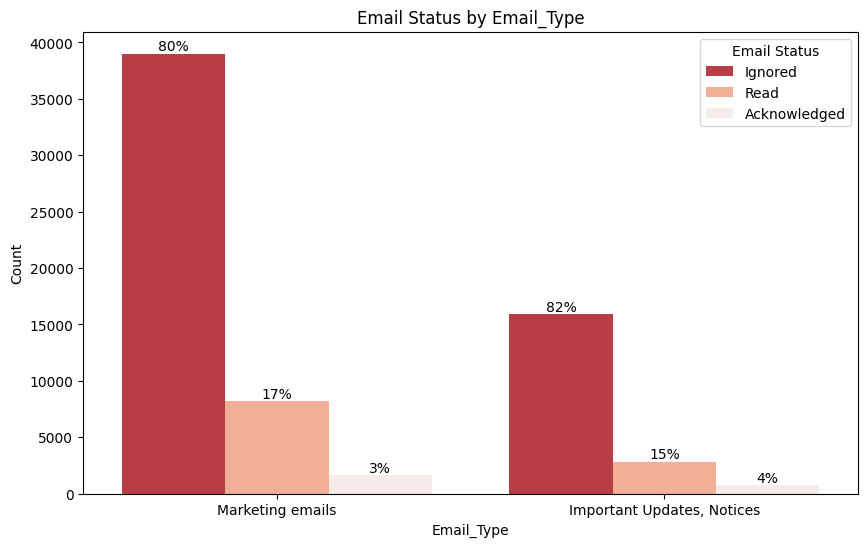

In [108]:
# Chart - 3 visualization code
color = ['#cc2936', "#ffa987", '#f7ebe8']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Email_Type', hue='Email_Status', data=email_df, palette = color )
plt.title('Email Status by Email_Type')

# add_percentage_labels(ax, total)
barPerc(email_df,'Email_Type',ax)

legend_labels = ['Ignored', 'Read', 'Acknowledged']  # Customize legend labels as needed
plt.legend(title='Email Status', labels=legend_labels)

# Set x-axis tick labels using plt.xticks
plt.xticks(ticks=[0,1], labels=['Marketing emails', 'Important Updates, Notices'])
plt.xlabel('Email_Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I selected the bar chart to compare the distribution of Email_Status across different Email_Type categories (1 for marketing emails and 2 for Important Updates, Notices)

##### 2. What is/are the insight(s) found from the chart?


*   Marketing emails are mostly ignored, with only a small percentage being read and an even smaller percentage being acknowledged.
*   Important updates emails have a slightly higher ignore rate compared to marketing emails but a marginally higher acknowledgment rate.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



*   The insights on email engagement rates can positively impact business by enabling improved targeting, optimized content strategies, and better resource allocation.
*   However, potential negative impacts include over-segmentation, content overload, and misinterpretation of data, which could lead to email fatigue and missed opportunities.



#### Chart - 4 - Distribution  of Subject Hotness Score

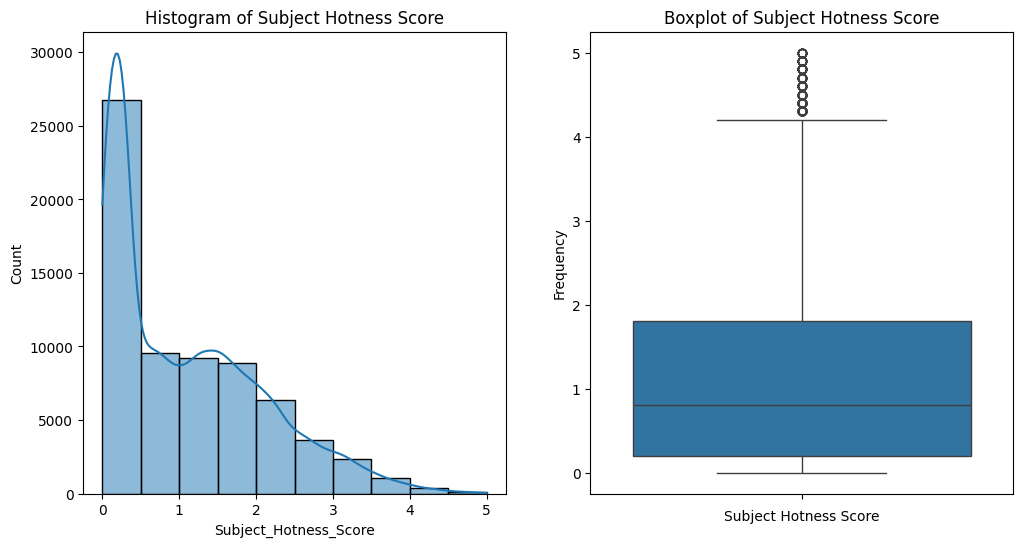

In [109]:
# Chart - 4 visualization code
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(email_df['Subject_Hotness_Score'], bins=10, kde=True)
plt.title('Histogram of Subject Hotness Score')

plt.subplot(1,2,2)
sns.boxplot(email_df['Subject_Hotness_Score'])
plt.title('Boxplot of Subject Hotness Score')


plt.xlabel('Subject Hotness Score')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is ideal for visualizing the distribution of a single continuous variable. It shows how often different values occur in a dataset, which helps in identifying the shape of the data distribution, such as skewness.

##### 2. What is/are the insight(s) found from the chart?

Most of the "Subject_Hotness_Score" values fall towards the lower end (0-1 range), with a long tail extending towards higher scores. This indicates that while the majority of email subjects are rated as having low effectiveness, there are a few outliers with high scores.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Recognizing that most email subjects need improvement and leveraging the high-performing subjects as models can lead to increased open rates, enhanced engagement, and better ROI. Improved subject lines can make emails more compelling, leading to higher engagement and conversions.

The high concentration of low scores indicates that most subject lines are ineffective. This can damage brand perception, as low engagement can make emails seem like spam, and it can lead to inefficient resource allocation, with efforts spent on strategies that do not yield desired results.

#### Chart - 5 - Percentage Distribution of Email Campaign Type

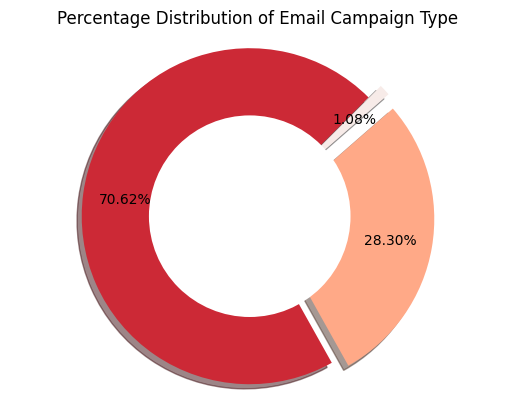

In [110]:
# Chart - 5 visualization code
explode = (0, 0.1, 0.1)

color = ['#cc2936', "#ffa987", '#f7ebe8']
# Create a donut chart
fig, ax = plt.subplots()
ax.pie(email_df["Email_Campaign_Type"].value_counts(), explode=explode,
        autopct='%1.2f%%', startangle=45, shadow = True,  pctdistance=0.75, colors = color)

# Draw a circle at the center with radius 0.60 to make it a donut chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
# Add a title
plt.title('Percentage Distribution of Email Campaign Type')
# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A donut pie chart visually emphasizes the relative proportions of email campaign types.

##### 2. What is/are the insight(s) found from the chart?

It highlights the dominance of Type 1 campaign (70.62%) and the minimal presence of Type 3 (1.08%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights suggest focusing on optimizing Type 1 campaigns, which could significantly impact business positively due to their large volume.

However, the negligible share of Type 3 may indicate underutilization or ineffectiveness, potentially leading to negative growth if not addressed and improved.

#### Chart - 6 - Email Status by Email Campaign Type

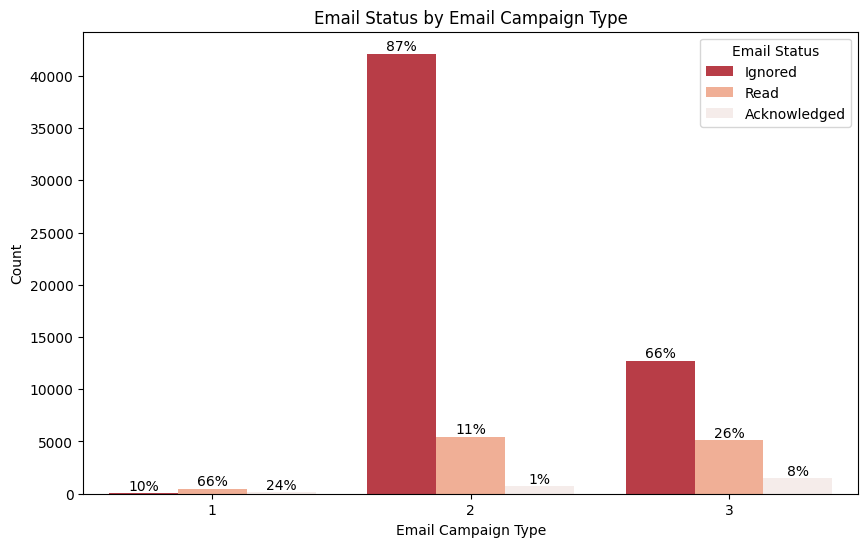

In [111]:
# Chart - 6 visualization code
plt.figure(figsize=(10, 6))
color = ['#cc2936', "#ffa987", '#f7ebe8']
ax = sns.countplot(x='Email_Campaign_Type', hue='Email_Status', data=email_df, palette = color)
barPerc(email_df,'Email_Campaign_Type',ax)

plt.xlabel('Email Campaign Type')
plt.ylabel('Count')
plt.title('Email Status by Email Campaign Type')
legend_labels = ['Ignored', 'Read', 'Acknowledged']  # Customize legend labels as needed
plt.legend(title='Email Status', labels=legend_labels)
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots allow for easy visualization of frequencies or percentages within each category, making it straightforward to identify patterns and trends.

##### 2. What is/are the insight(s) found from the chart?

 Type 1 campaigns are the most effective with high acknowledgment rates (66%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help optimize future campaigns by focusing on the successful elements of Type 1. Conversely, Type 2 campaigns show high ignore rates (87%), indicating a potential area for improvement to avoid negative growth by refining or discontinuing ineffective strategies.

#### Chart - 7 - Email Status by Time Email Sent Category

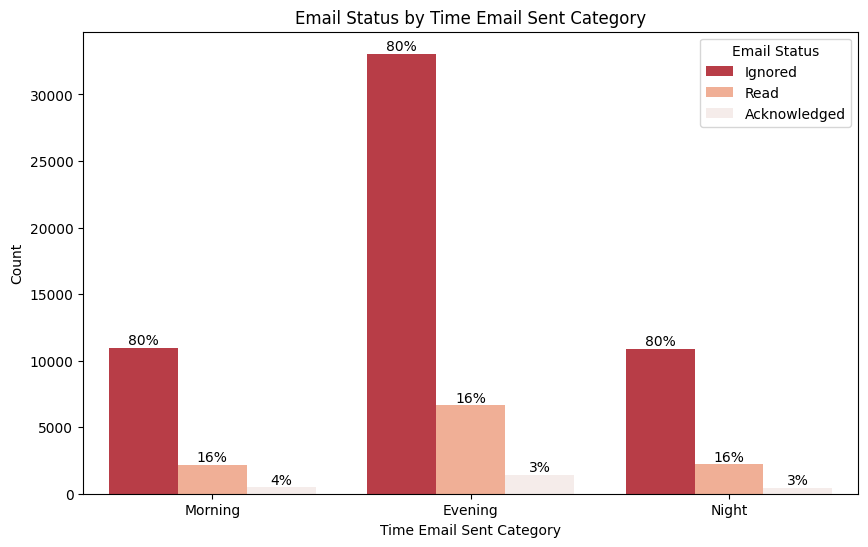

In [112]:
# Chart - 7 visualization code
plt.figure(figsize=(10, 6))
color=['#cc2936', "#ffa987", '#f7ebe8']
ax = sns.countplot(x='Time_Email_sent_Category', hue='Email_Status', data=email_df, palette = color)
barPerc(email_df,'Time_Email_sent_Category',ax)

legend_labels = ['Ignored', 'Read', 'Acknowledged']  # Customize legend labels as needed
plt.legend(title='Email Status', labels=legend_labels)
plt.title('Email Status by Time Email Sent Category')
# Set x-axis tick labels using plt.xticks
plt.xticks(ticks=[0, 1, 2], labels=['Morning', 'Evening', 'Night'])
plt.xlabel('Time Email Sent Category')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I selected the bar plot for analyzing the distribution of Email_Status across different Time_Email_sent_Category because bar plots are effective in visually comparing categorical data.

##### 2. What is/are the insight(s) found from the chart?

The insights show consistent engagement rates across different times of day, suggesting time of sending has minimal impact.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights indicate no clear advantage in changing send times, implying efforts should focus on content and targeting improvements. There's no evidence of insights leading to negative growth

#### Chart - 8 - Percentage Distribution of Email Source Types

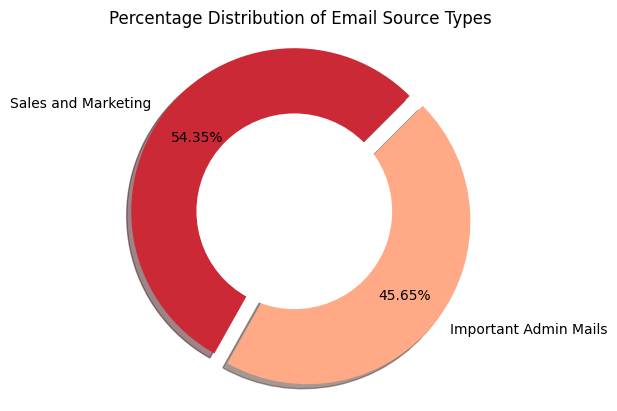

In [113]:
# Chart - 8 visualization code
explode = (0, 0.1)
color =  ['#cc2936', "#ffa987"]
# Create a donut chart
fig, ax = plt.subplots()
ax.pie(email_df["Email_Source_Type"].value_counts(), explode=explode, labels=['Sales and Marketing', 'Important Admin Mails'],
        autopct='%1.2f%%', startangle=45, shadow = True,  pctdistance=0.75, colors = color)

# Draw a circle at the center with radius 0.60 to make it a donut chart
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
# Add a title
plt.title('Percentage Distribution of Email Source Types')
# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Donut charts to visualize the proportion of Sales and Marketing versus Important Admin Mails

##### 2. What is/are the insight(s) found from the chart?

Gained insights show a significant split between these email types, indicating a need for balanced attention to both categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This understanding can help optimize email strategies, ensuring relevant content is targeted effectively.

#### Chart - 9 - Email Status by Email_Source_Type

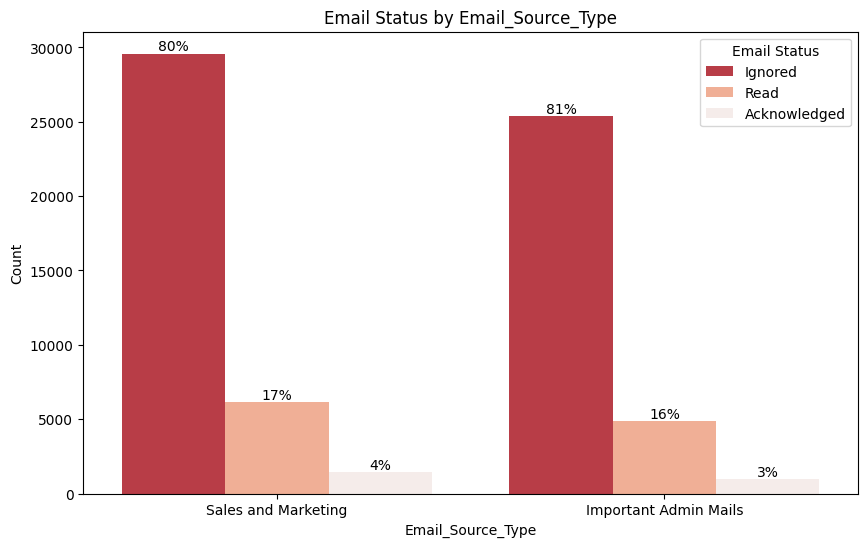

In [114]:
# Chart -9  visualization code
plt.figure(figsize=(10, 6))
color = ['#cc2936', "#ffa987", '#f7ebe8']
ax = sns.countplot(x='Email_Source_Type', hue='Email_Status', data=email_df, palette = color)

barPerc(email_df,'Email_Source_Type',ax)

legend_labels = ['Ignored', 'Read', 'Acknowledged']  # Customize legend labels as needed
plt.legend(title='Email Status', labels=legend_labels)
plt.title('Email Status by Email_Source_Type')
# Set x-axis tick labels using plt.xticks
plt.xticks(ticks=[0, 1], labels=['Sales and Marketing', 'Important Admin Mails'])
plt.xlabel('Email_Source_Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are suitable here because they allow for a clear comparison between different categories (Email_Source_Type) and their corresponding Email_Status

##### 2. What is/are the insight(s) found from the chart?

Both types of emails face challenges with high rates of ignored emails.
Responses to emails, especially acknowledged, are relatively low, indicating potential areas for improvement in engagement strategies and content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights into which types of emails (sales/marketing vs. admin) have higher engagement (status 1, read) can guide resource allocation and follow-up strategies.

If a significant proportion of emails from both have a high percentage in status 0 (ignored), it could indicate ineffective targeting or content fatigue among recipients. This might lead to negative growth if not addressed, as it suggests potential disinterest or spam filtering by recipients.

#### Chart - 10 - Distribution of Total Past Communications by Email Status

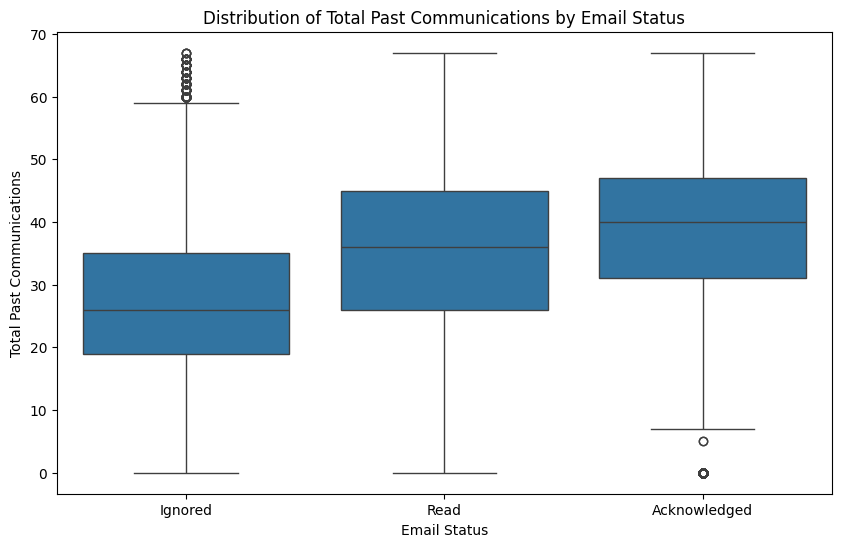

In [115]:
# Chart - 10 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(x='Email_Status', y='Total_Past_Communications', data=email_df)

plt.xlabel('Email Status')
plt.xticks(ticks=[0, 1,2], labels=['Ignored', 'Read', 'Acknowledged'] )
plt.ylabel('Total Past Communications')
plt.title('Distribution of Total Past Communications by Email Status')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplots are particularly useful for identifying key statistics (median, quartiles) and potential outliers in the data, which can provide valuable insights into the behavior and characteristics of the data points.


##### 2. What is/are the insight(s) found from the chart?

In [116]:
email_df.groupby(['Email_Status'])['Total_Past_Communications'].median()

Email_Status
0    26.0
1    36.0
2    40.0
Name: Total_Past_Communications, dtype: float64

The median number of past communications for emails that are ignored (0) is 28, for emails that are read (1) is 34, for emails that are acknowledged (2) is 39.

For ignored emails (0), there are outliers in the range of 55 to 68 approx.

As the median values increase from ignored to read to acknowledged, it indicates that customers with more past communications are more likely to engage with the emails. Specifically, customers with a history of more interactions tend to not only read but also acknowledge the emails.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding that emails with higher past communications are more likely to be read or acknowledged can help tailor future email campaigns.

The presence of outliers who ignore emails despite high past communications (55 to 68) approx,  could indicate potential issues such as email fatigue, relevance of content, or poor targeting. If these issues are not addressed, it could lead to decreased customer engagement and potential loss of interest over time.

#### Chart - 11 - Mean Word Count by Email Status

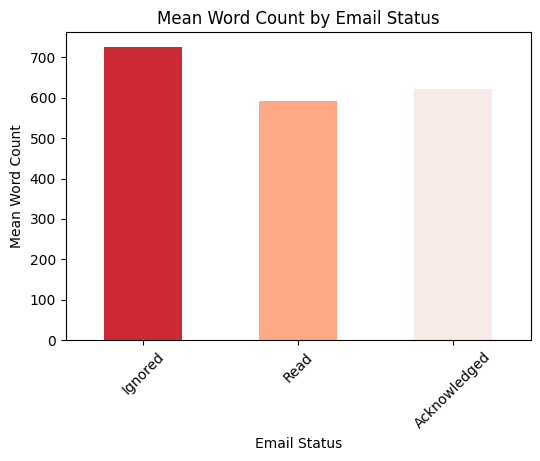

In [117]:
# Chart - 11 visualization code
plt.figure(figsize=(6,4))
color = ['#cc2936', "#ffa987", '#f7ebe8']
email_df.groupby(['Email_Status'])['Word_Count'].mean().plot(kind='bar', color=  color)

plt.xlabel('Email Status')
plt.xticks(ticks=[0, 1,2], labels=['Ignored', 'Read', 'Acknowledged'] )
plt.xticks(rotation=45)
plt.ylabel('Mean Word Count')
plt.title('Mean Word Count by Email Status')
plt.show()

##### 1. Why did you pick the specific chart?

The barplot was chosen to visualize and compare the mean word counts across different Email_Status categories. Barplots are effective for displaying comparative data, making it easy to see differences in means between groups.

##### 2. What is/are the insight(s) found from the chart?

In [118]:
email_df.groupby(['Email_Status'])['Word_Count'].mean()

Email_Status
0    725.256785
1    590.939578
2    620.615255
Name: Word_Count, dtype: float64

High Word Counts for Ignored Emails: Ignored emails have the highest mean word count compared to read and acknowledged emails. This might indicate that longer emails are not necessarily more effective in capturing attention or engagement.

Lower Word Counts for Read and Acknowledged Emails: Read and acknowledged emails have lower mean word counts compared to ignored emails. This suggests that concise and focused communication might be more effective in gaining attention and prompting action

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding that shorter to moderate-length emails are more likely to be read and acknowledged, businesses can optimize the word count of their emails to improve engagement rates.

Businesses can focus on delivering concise, relevant, and engaging content that aligns with the optimal word count range (around 590-620 words)

Continued use of long-form content without addressing recipient preferences could lead to decreased engagement over time.

#### Chart - 12 - Distribution of Total Links by Email Status

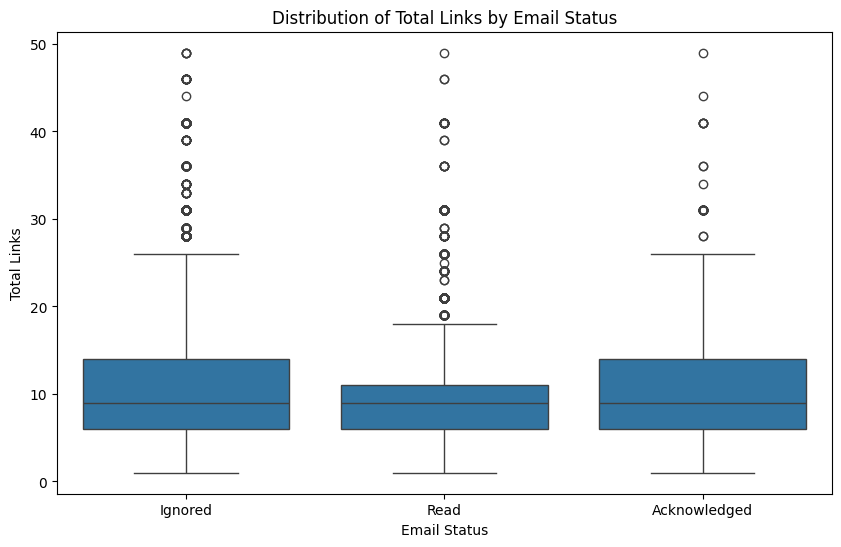

In [119]:
# Chart - 12 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(x='Email_Status', y='Total_Links', data=email_df)
plt.xlabel('Email Status')
plt.xticks(ticks=[0, 1,2], labels=['Ignored', 'Read', 'Acknowledged'] )
plt.ylabel('Total Links')
plt.title('Distribution of Total Links by Email Status')
plt.show()

In [120]:
email_df.groupby(['Email_Status'])['Total_Links'].median()

Email_Status
0    9.0
1    9.0
2    9.0
Name: Total_Links, dtype: float64

##### 1. Why did you pick the specific chart?

Boxplots are particularly useful for identifying key statistics (median, quartiles) and potential outliers in the data, which can provide valuable insights into the behavior and characteristics of the data points

##### 2. What is/are the insight(s) found from the chart?

Email ignored generally have large number of links.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


The presence of outliers who ignore emails could indicate potential issues such as email fatigue, relevance of content, or poor targeting. If these issues are not addressed, it could lead to decreased customer engagement and potential loss of interest over time.

#### Chart - 13 - Total links, Total image ,Total_Past_Communications outiers and distribution visualisation

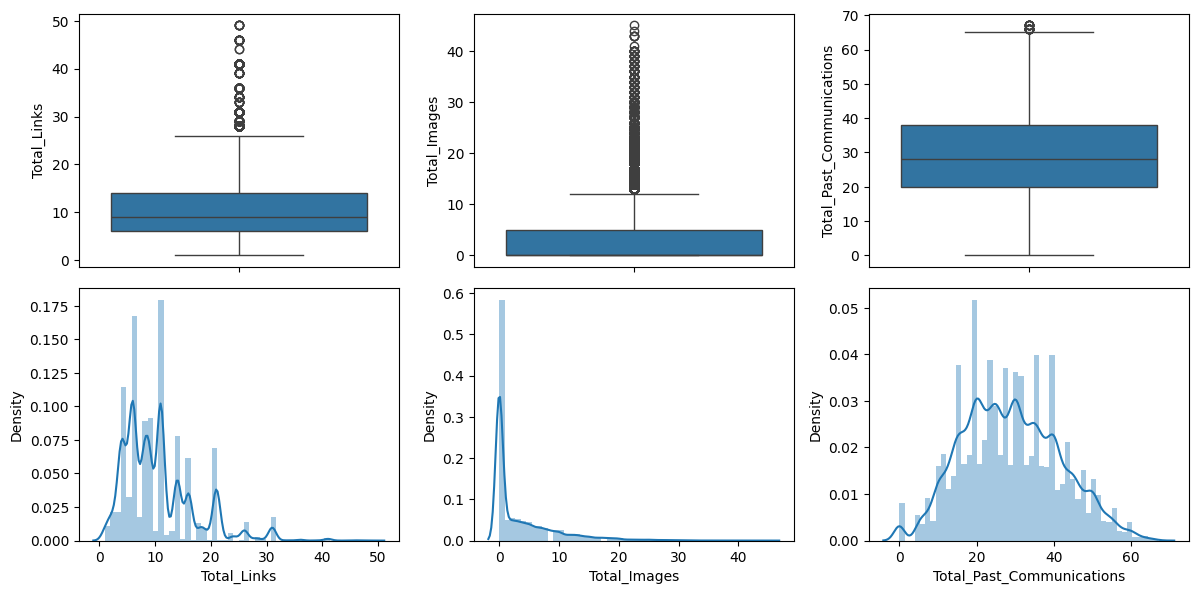

In [121]:
# Chart - 13 visualization code
# Observing the Total links, Total image ,Total_Past_Communications columns for outiers and distribution to decide resonable imputation method
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.boxplot(email_df['Total_Links'])

plt.subplot(2,3,4)
sns.distplot(email_df['Total_Links'])

plt.subplot(2,3,2)
sns.boxplot(email_df['Total_Images'])

plt.subplot(2,3,5)
sns.distplot(email_df['Total_Images'])

plt.subplot(2,3,3)
sns.boxplot(email_df['Total_Past_Communications'])

plt.subplot(2,3,6)
sns.distplot(email_df['Total_Past_Communications'])


plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Boxplot and distplot help to know the structure of our data.

##### 2. What is/are the insight(s) found from the chart?

Total links, total images , past communication have outlier. Also Total links, total images are right skewed, Total past communication is normally distributed

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Handling outliers and normalizing skewed features can enhance model performance and provide more reliable insights, leading to positive business impact.
Ignoring outliers or not transforming skewed data might result in inaccurate predictions and strategies, potentially causing negative growth.

#### Chart - 14 - Correlation Heatmap

<Axes: >

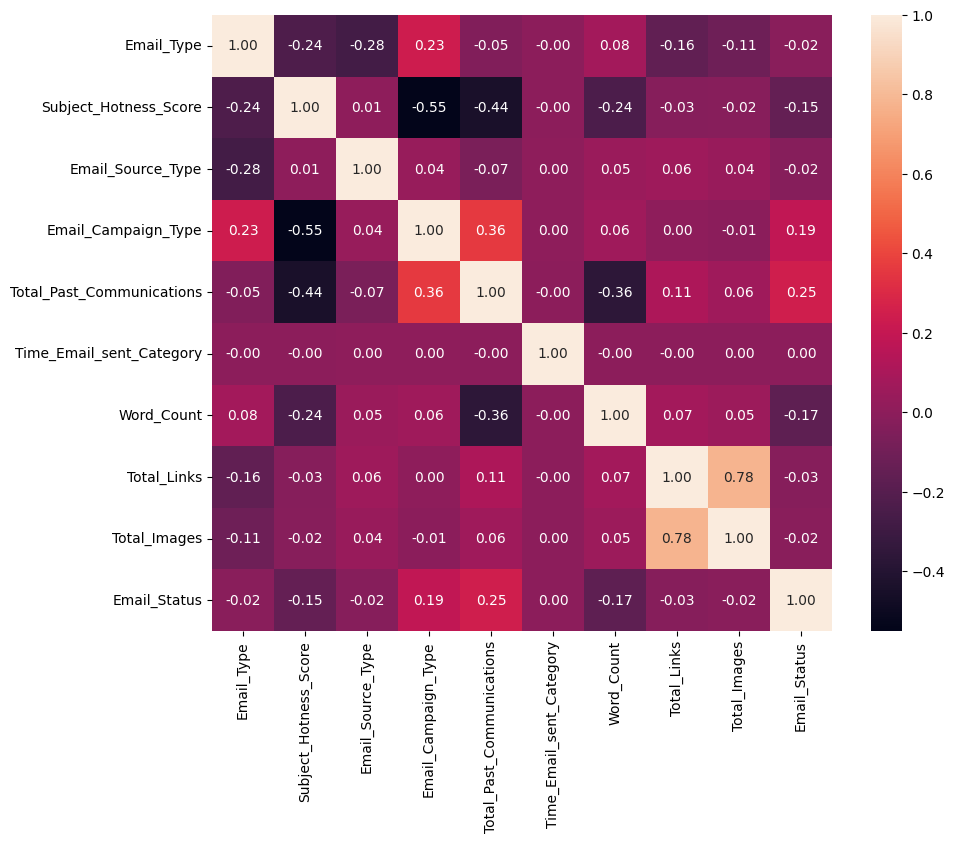

In [122]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,8))
sns.heatmap(email_df.corr(),annot=True, fmt='.2f')

##### 1. Why did you pick the specific chart?

Heatmaps are excellent to find correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

Total email sent category have 0 correlationwith target variable while email campaign type and past communication are have high correlation

Total links and Total images are multicollinear

#### Chart - 15 - Pair Plot

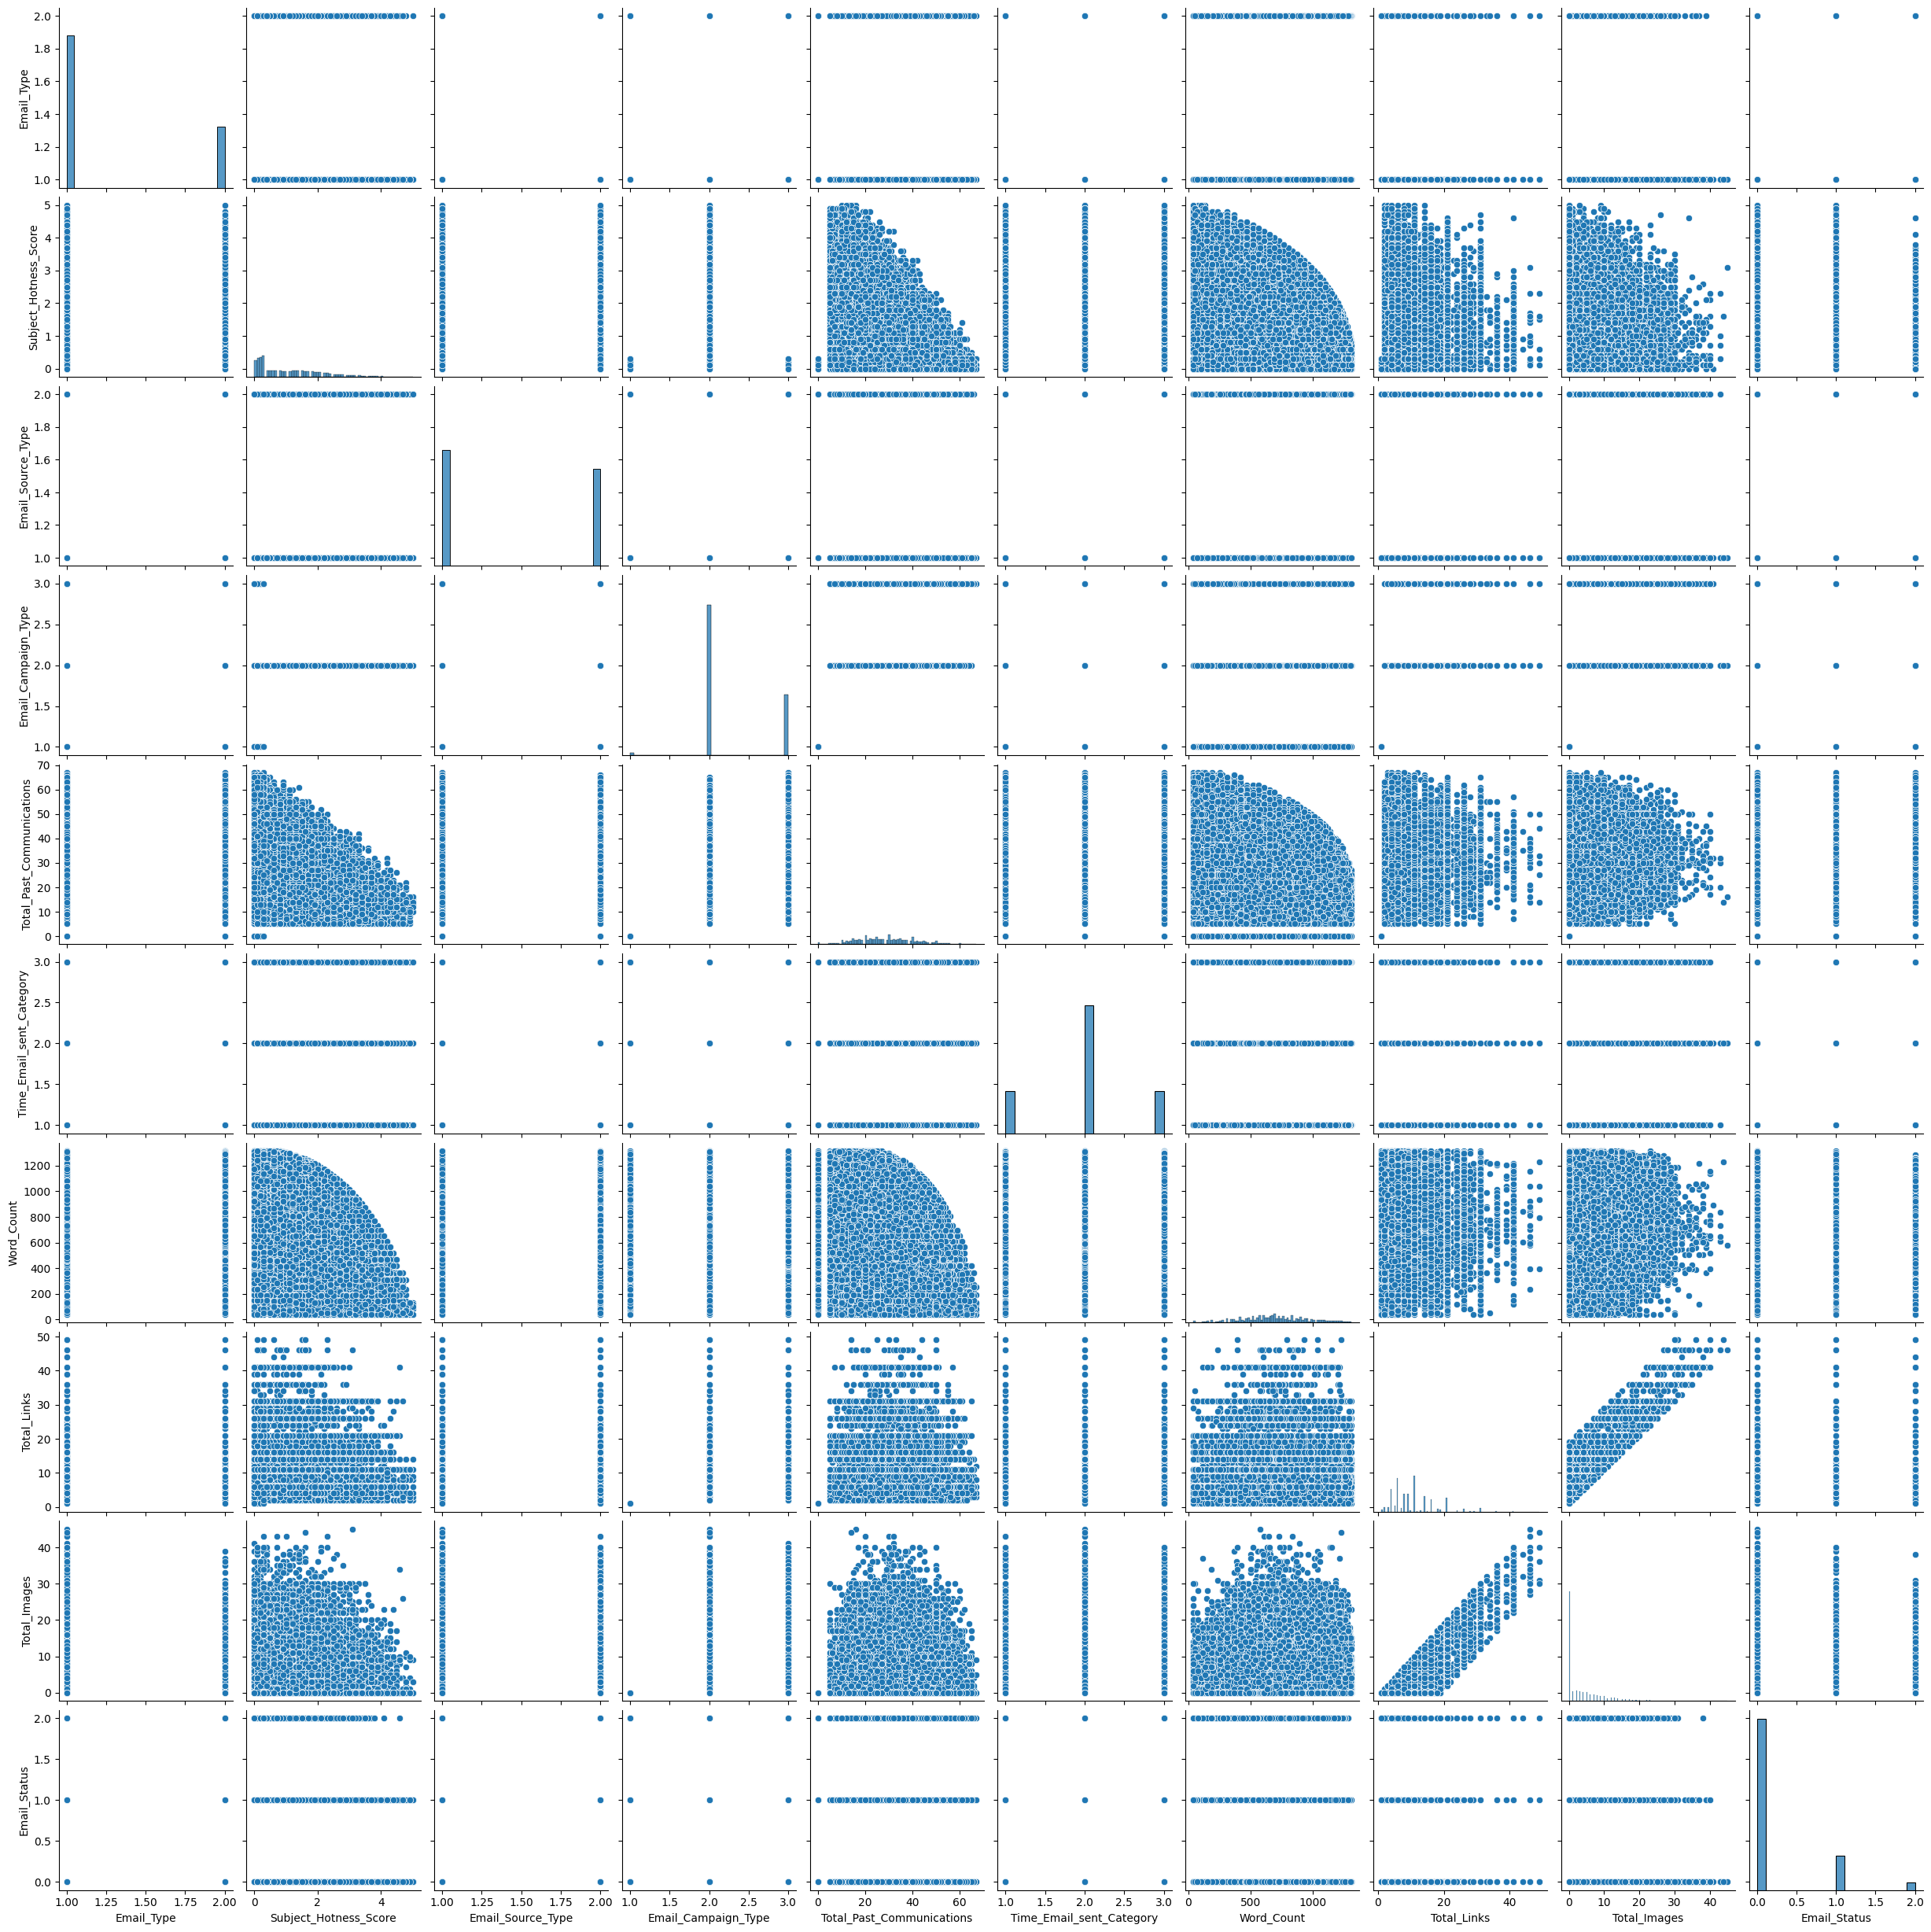

In [123]:
# Pair Plot visualization code
sns.pairplot(email_df)

##### 1. Why did you pick the specific chart?

Pairplots are used to visualize the relationships and distributions between multiple numerical features in a dataset, helping identify correlations and patterns. They also assist in detecting outliers and understanding feature interactions.

##### 2. What is/are the insight(s) found from the chart?

The dataset is non linear in nature.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement 1 - Subject Hotness Score

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis (H0): There is no significant difference in the mean Subject Hotness Score between emails that are ignored, read, or acknowledged.

Alternative Hypothesis (H1): There is a significant difference in the mean Subject Hotness Score between emails that are ignored, read, or acknowledged

#### 2. Perform an appropriate statistical test.

In [124]:
# Perform Statistical Test to obtain P-Value

# Fit the model
model = ols('Q("Subject_Hotness_Score") ~ C(Q("Email_Status"))', data=email_df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Extract p-value
p_value = anova_table['PR(>F)'][0]

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean Subject Hotness Score between different Email Status categories.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean Subject Hotness Score between different Email Status categories.")

                            sum_sq       df           F  PR(>F)
C(Q("Email_Status"))   1496.200307      2.0  768.621924     0.0
Residual              66525.093716  68350.0         NaN     NaN
Reject the null hypothesis: There is a significant difference in the mean Subject Hotness Score between different Email Status categories.


##### Which statistical test have you done to obtain P-Value?

ANOVA (Analysis of Variance) test is used

##### Why did you choose the specific statistical test?

**ANOVA** was used because i have to compare means of different groups and to determine if there are any statistically significant differences between them.
Since I have continuous feature **Subject Hotness Score** and categorical Target variable **Email Status** with more than two categories, thus ANOVA test is useful.

### Hypothetical Statement 2 - Email Type

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


Null Hypothesis (H0): Email Type has no effect on the Email Status (ignored, read, acknowledged).

Alternative Hypothesis (H1): Email Type has an effect on the Email Status (ignored, read, acknowledged).

#### 2. Perform an appropriate statistical test.

In [125]:
# Perform Statistical Test to obtain P-Value

# Create a contingency table
contingency_table = pd.crosstab(email_df['Email_Type'], email_df['Email_Status'])
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Set significance level
alpha = 0.05

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between Email Type and Email Status.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Email Type and Email Status.")

Email_Status      0     1     2
Email_Type                     
1             39004  8208  1654
2             15937  2831   719
Chi-Square statistic: 54.84208904771182
p-value: 1.2336491824483095e-12
Degrees of freedom: 2
Expected frequencies:
[[39277.67480579  7891.85220839  1696.47298582]
 [15663.32519421  3147.14779161   676.52701418]]
Reject the null hypothesis: There is a significant association between Email Type and Email Status.


##### Which statistical test have you done to obtain P-Value?

 I have used **Chi-Square test** to obtain P- Value

##### Why did you choose the specific statistical test?

Both Email Type and Email Status are categorical variables. The Chi-Square test is designed to evaluate relationships between categorical variables.

### Hypothetical Statement 3 - Word Count

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: There is no relationship between word count and the likelihood of an email being acknowledged.

Alternative Hypothesis: Emails with higher word counts are less likely to be acknowledged.

#### 2. Perform an appropriate statistical test.

In [126]:
# Perform Statistical Test to obtain P-Value
# Create a contingency table
contingency_table = pd.crosstab(email_df['Word_Count'], email_df['Email_Status'])
print(contingency_table)

# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square statistic: {chi2}")
print(f"p-value: {p}")

# Set significance level
alpha = 0.05

# Interpret the results
if p < alpha:
    print("Reject the null hypothesis: There is no relationship between word count and the likelihood of an email being acknowledged.")
else:
    print("Fail to reject the null hypothesis: Emails with higher word counts are less likely to be acknowledged.")

Email_Status    0    1   2
Word_Count                
40            209  175  21
50             31   25   2
51             44   48   4
67             77   51   7
79            101   54   9
...           ...  ...  ..
1303           91    4   0
1309           18    1   0
1310           68    3   0
1315           41    1   0
1316           59    5   0

[151 rows x 3 columns]
Chi-Square statistic: 3960.9323132169116
p-value: 0.0
Reject the null hypothesis: There is no relationship between word count and the likelihood of an email being acknowledged.


##### Which statistical test have you done to obtain P-Value?

I have used Chi-Square test to obtain P- Value

##### Why did you choose the specific statistical test?

Because one of my variable is continuous and one is categorical

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [127]:
# Handling Missing Values & Missing Value Imputation
email_df['Total_Links'].fillna(email_df['Total_Links'].median(), inplace=True)
email_df['Total_Images'].fillna(email_df['Total_Images'].median(), inplace=True)
email_df['Total_Past_Communications'].fillna(email_df['Total_Past_Communications'].mean(), inplace=True)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since Total_Links, Total_Images are continuous and have outliers median would be a resonable imputational method,
while for Total_Past_Communications mean would be reasonable


### 2. Handling Outliers

In [128]:
def IOR(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.0 * IQR
    upper_bound = Q3 + 1.0 * IQR

    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index

    median_value = df[column].median()

    df.loc[outlier_indices, column] = median_value



Handling Outliers for Total Links, Total_Images, Subject_Hotness_Score

In [129]:
IOR(email_df, 'Total_Links')
IOR(email_df, 'Total_Images')
IOR(email_df, 'Subject_Hotness_Score')

Handling Outliers for Total Past Communication

In [130]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(email_df['Total_Past_Communications'], nan_policy='omit'))

# Set a threshold for identifying outliers
threshold = 3

# Identify outliers

outliers_TPC = (z_scores > threshold)

# Count the number of outliers
num_outliers = outliers_TPC.sum()

# Calculate the percentage of data that will be lost if outliers are removed
percentage_lost = (num_outliers / len(email_df)) * 100


print(f"Number of outliers: {num_outliers}")
print(f"Percentage of data that will be lost: {percentage_lost:.2f}%")
# Filter out the outliers
final_df = email_df[~outliers_TPC]


Number of outliers: 60
Percentage of data that will be lost: 0.09%


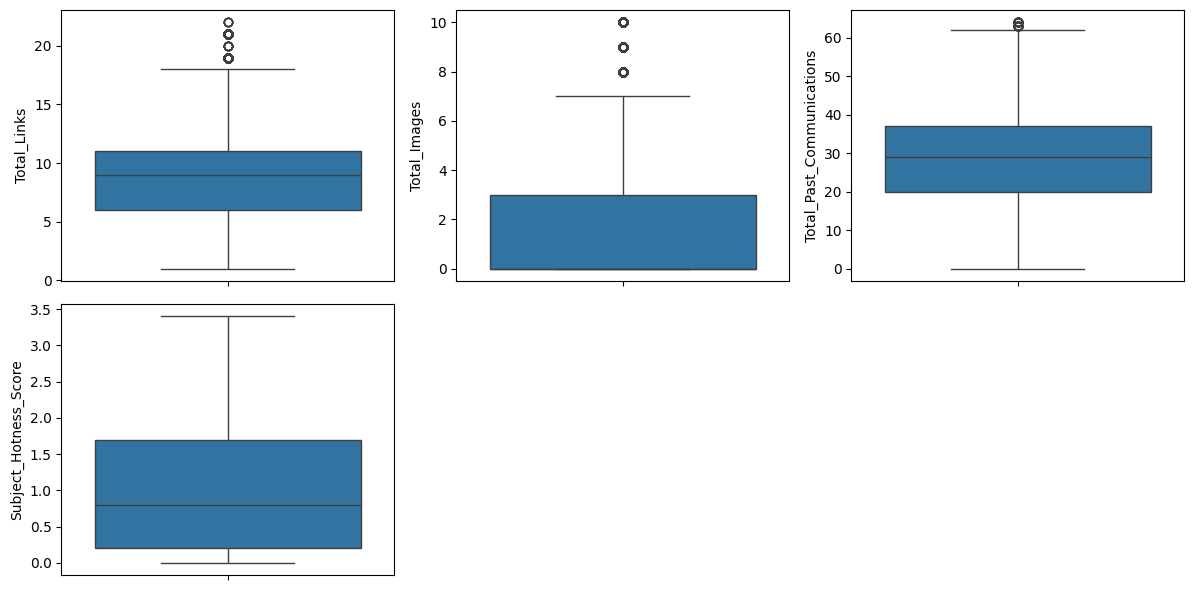

In [131]:
plt.figure(figsize=(12,6))
plt.subplot(2,3,1)
sns.boxplot(final_df['Total_Links'])

plt.subplot(2,3,2)
sns.boxplot(final_df['Total_Images'])


plt.subplot(2,3,3)
sns.boxplot(final_df['Total_Past_Communications'])

plt.subplot(2,3,4)
sns.boxplot(final_df['Subject_Hotness_Score'])


plt.tight_layout()
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

In preparing my dataset for email campaign effectiveness prediction, I treated outliers in four continuous columns: Subject_Hotness_Score, Total_Links, Total_Images, and Total_Past_Communications.

For the right-skewed Subject_Hotness_Score and Total_Images, I used the Interquartile Range (IQR) method, as it effectively handles skewed data. For the normally distributed Total_Links and Total_Past_Communications, I employed the Z-score method, which is suitable for normal distributions.

However, I found that Total_Links had 28% outliers, and removing them would lead to a 41% reduction in the dataset. To preserve data integrity, I chose not to remove outliers from Total_Links. Overall, treating outliers in the other columns resulted in only a 4% data loss, ensuring the dataset remained robust and reliable for analysis.








### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

My dataset dont need encoding as categorical columns are already encoded


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [132]:
df = final_df.copy()

In [133]:
# Manipulate Features to minimize feature correlation and create new features
# as we know that total_links and total _images are multicorelated so we will create new features by combining these two

df['email_attachments']= df['Total_Images'] + df['Total_Links']

#### 2. Feature Selection

Mutual Information Scores:
Total_Past_Communications    0.057701
Email_Campaign_Type          0.050155
Word_Count                   0.028329
Subject_Hotness_Score        0.024658
Total_Links                  0.020551
email_attachments            0.018389
Email_Type                   0.006403
Email_Source_Type            0.006314
Time_Email_sent_Category     0.002378
Total_Images                 0.000000
dtype: float64


<Axes: >

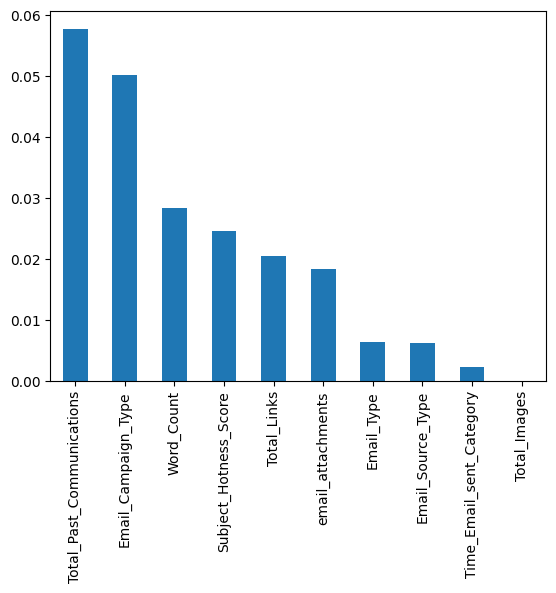

In [134]:
# Select your features wisely to avoid overfitting

X = df.drop('Email_Status', axis=1)
y = df['Email_Status']

mi = mutual_info_classif(X, y, discrete_features='auto')
mi_series = pd.Series(mi, index=X.columns)
mi_series = mi_series.sort_values(ascending=False)
print("Mutual Information Scores:")
print(mi_series)

mi_series.plot(kind='bar')

In [136]:
# Define categorical features
from sklearn.feature_selection import SelectKBest, chi2

categorical_features = ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Time_Email_sent_Category']


X_categorical = X[categorical_features]

# Perform Chi-Square test
chi2_selector = SelectKBest(chi2, k='all')
X_kbest_chi2 = chi2_selector.fit_transform(X_categorical, y)
chi2_scores = chi2_selector.scores_
chi2_pvalues = chi2_selector.pvalues_

chi2_results = pd.Series(chi2_pvalues, index=categorical_features).sort_values(ascending=False)
print("\nChi-Square Test Results:")
print(chi2_results)



Chi-Square Test Results:
Time_Email_sent_Category    9.144274e-01
Email_Source_Type           2.728569e-02
Email_Type                  1.412150e-02
Email_Campaign_Type         5.936472e-50
dtype: float64


##### What all feature selection methods have you used  and why?

As we know that total_links and total _images are multicorelated so we will create new features by combining these two.

Also I used Mutual Information Gain and Chi-Square Test. Since dataset contains both categorical and continuous features, the most comprehensive approach is to use Mutual Information Gain (MIG). This method can handle both types of data and capture nonlinear relationships.

I used Chi-Square Test to decide whether Time_Email_sent_Category_2 should be selected or not. Since Its P values are very high we will drop it.

##### Which all features you found important and why?


*   Based on this techniques features with high MIG values and lower P values are selected :

    Total_Past_Communications     
    Email_Campaign_Type_2         
    Email_Campaign_Type_3        
    Word_Count                    
    Subject_Hotness_Score           
    Email_Source_Type_2  
    email_attchments

*   We would like to drop

    Total_Images    
    Total_Links             
    Email_Type_2    
    Time_Email_sent_Category_2            
    Time_Email_sent_Category_3




In [137]:
df.drop(["Total_Images",'Total_Links','Email_Type', 'Time_Email_sent_Category'], axis = 1, inplace = True)

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Ye, Because I have skewed data

In [138]:
from sklearn.preprocessing import PowerTransformer

# Initialize PowerTransformer with Yeo-Johnson method
pt = PowerTransformer(method='yeo-johnson', standardize=False)

# Assuming X is a DataFrame with columns Total_Links, Total_Images, Total_Past_Communications
df[['email_attachments','Subject_Hotness_Score']] = pt.fit_transform(df[['email_attachments', 'Subject_Hotness_Score']])


### 6. Data Scaling

In [139]:
# Scaling your data

columns_to_scale_min_max = [ 'Subject_Hotness_Score','Word_Count',
                      'email_attachments', 'Total_Past_Communications']
# Normalization
scaler_minmax = MinMaxScaler()


# Apply normalization
df[columns_to_scale_min_max] = scaler_minmax.fit_transform(df[columns_to_scale_min_max])
df.head()

,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Word_Count,Email_Status,email_attachments
0,0.826813,2,2,0.515625,0.313480,0,0.451680
1,0.808456,1,2,0.234375,0.363636,0,0.311762
2,0.081224,1,3,0.562500,0.722571,1,0.311762
3,0.950191,2,2,0.390625,0.446708,0,0.703678
4,0.000000,2,3,0.281250,0.710815,0,0.253567


##### Which method have you used to scale you data and why?


*   I have used **Normalization (Min-Max Scaling)**.
Normalization scales the data to a fixed range, usually [0, 1]. Since most of the columns data are binary so scaling in [0,1] is suitable.








### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Not Required because dimensionality reduction techniques are applied to reduce the number of input variables or features under consideration. And since i have not that many input features it is unneccssary to do so.

In [140]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

##### What data splitting ratio have you used and why?

I have used 80:20 ratio as well as used **stratify=y** bold text in train_test_split to ensure that the proportion of classes in the training and testing sets are similar to that in the original dataset.

In [141]:
# Split your data to train and test. Choose Splitting ratio wisely.

X=df.drop('Email_Status',axis=1)
y=df['Email_Status']

print(f'Shape of X: {X.shape}')
print(f'Shape of Y: {y.shape}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


Shape of X: (68293, 6)
Shape of Y: (68293,)


### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes my dataset is imbalanced as my target Variable Email_status has approx 80.38% ignored values(0), 16% read (1), and 3% acknowledged values(2).

####SMOTE (Synthetic Minority Over-sampling Technique) Technique

In [142]:
# Handling Imbalanced Dataset (If needed)
from collections import Counter
# Applying SMOTE to the training data

counter= Counter(y_train)
print('Before',counter)

smote = SMOTE(random_state=42)
X_smt, y_smt = smote.fit_resample(X_train, y_train)

print('Original dataset shape', X_train.shape)
print('Resampled dataset shape', len(y_smt))
counter = Counter(y_smt)
print('After',counter)

Before Counter({0: 43928, 1: 8814, 2: 1892})
Original dataset shape (54634, 6)
Resampled dataset shape 131784
After Counter({0: 43928, 2: 43928, 1: 43928})


## ***7. ML Model Implementation***





### ML Model 1 - Random Forest Classifier

In [143]:
# ML Model - 1 Implementation
rmt_model = RandomForestClassifier()

# Fit the Algorithm
rmt_model.fit(X_smt, y_smt)

# Predict on the model
pred_test_rmf= rmt_model.predict(X_test)

pred_proba_test_rmf = rmt_model.predict_proba(X_test)

In [144]:
#Checking the evaluation metrices on test data
print("Accuracy on test data:", accuracy_score(y_test, pred_test_rmf))
print("Precision on test data:", precision_score(y_test, pred_test_rmf, average = 'weighted'))
print("Recall on test data:", recall_score(y_test, pred_test_rmf, average = 'weighted'))
print("F1 score on test data:", f1_score(y_test, pred_test_rmf, average = 'weighted'))
print("ROC AUC on test data:", roc_auc_score(y_test, pred_proba_test_rmf, multi_class='ovr'))

Accuracy on test data: 0.7554725821802475
Precision on test data: 0.7453775908248713
Recall on test data: 0.7554725821802475
F1 score on test data: 0.7500949030739514
ROC AUC on test data: 0.7127947707946367


In [145]:
rmf_model_train = RandomForestClassifier()

# Fit the Algorithm
rmf_model_train.fit(X_smt, y_smt)

pred_train_rmf = rmf_model_train.predict(X_smt)
pred_proba_train_rmf= rmt_model.predict_proba(X_smt)

In [146]:
#Checking the evaluation metrices on test data
print("Accuracy on train data:", accuracy_score(y_smt, pred_train_rmf))
print("Precision on train data:", precision_score(y_smt, pred_train_rmf, average = 'weighted'))
print("Recall on train data:", recall_score(y_smt, pred_train_rmf, average = 'weighted'))
print("F1 score on train data:", f1_score(y_smt, pred_train_rmf, average = 'weighted'))
print("ROC AUC on train data:", roc_auc_score(y_smt, pred_proba_train_rmf, multi_class='ovr'))

Accuracy on train data: 0.9971847872275845
Precision on train data: 0.9971846598710484
Recall on train data: 0.9971847872275845
F1 score on train data: 0.9971847182925468
ROC AUC on train data: 0.9999721270876654


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* Random Forest is a machine learning algorithm that creates a "forest" of decision trees to make

* I have used F1 Score to compare performance of model on training and testing data

* The F1 Score for test data is 0.749 and for train data it is 0.997. This clearly shows that the model is quite overfitted.



In [147]:
f1_rmf_test = f1_score(y_test, pred_test_rmf, average = 'weighted')
f1_rmf_train = f1_score(y_smt, pred_train_rmf, average = 'weighted')
rmf_dt = pd.DataFrame([{'Random Forest Classifier test': f1_rmf_test,'Random Forest Classifier train': f1_rmf_train}])

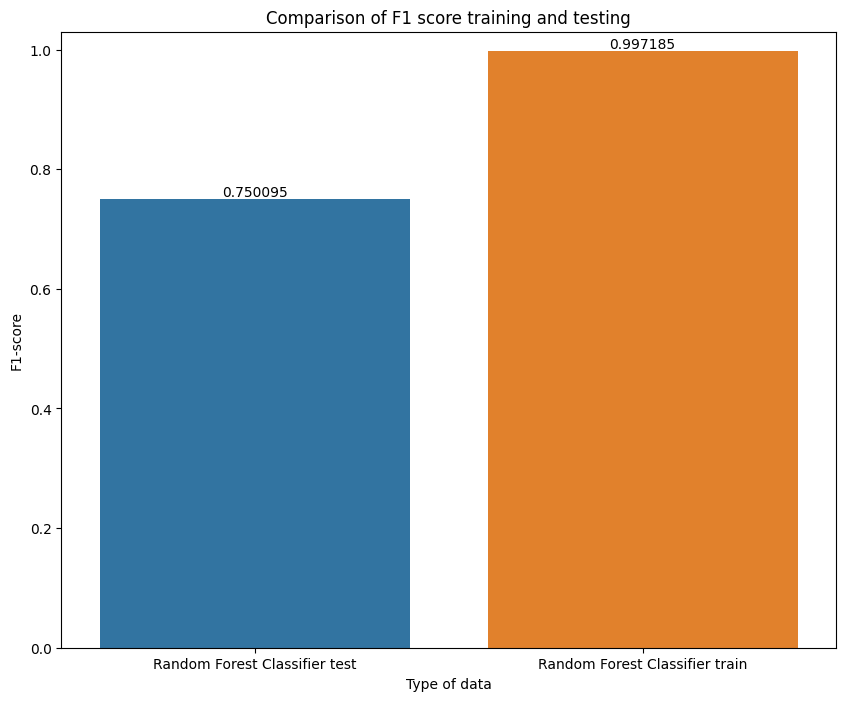

In [148]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 8))
graph = sns.barplot(data=rmf_dt)
for bar in graph.containers:
    graph.bar_label(bar)
plt.title('Comparison of F1 score training and testing')
plt.ylim(0,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Hyperparameter Tuning Random Forest Classifier with SMOTE

In [149]:
rmf_classifier = RandomForestClassifier()

param_dist = {'max_depth': [19, 20],'min_samples_split': [40,50],'max_features': ['log2'], 'min_samples_leaf': [5,6,7], 'bootstrap': [True, False]}

randomizedsearchcv = RandomizedSearchCV(rmf_classifier, param_distributions=param_dist, n_iter=10, cv=2, scoring='f1', verbose=2, n_jobs=-1, random_state=42)
randomizedsearchcv.fit(X_smt, y_smt)

# Access best parameters and best score
best_params_rmf= randomizedsearchcv.best_params_


Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [150]:
best_params_rmf

{'min_samples_split': 40,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 20,
 'bootstrap': True}

In [151]:
best_rmf_classifier = RandomForestClassifier(**best_params_rmf)
best_rmf_classifier.fit(X_smt, y_smt)
pred_rmf_test_opt = best_rmf_classifier.predict(X_test)
pred_proba_rmf_test_opt = best_rmf_classifier.predict_proba(X_test)

In [152]:
#Checking the evaluation metrices on test data
print("Accuracy on test data:", accuracy_score(y_test, pred_rmf_test_opt))
print("Precision on test data:", precision_score(y_test, pred_rmf_test_opt, average = 'weighted'))
print("Recall on test data:", recall_score(y_test, pred_rmf_test_opt, average = 'weighted'))
print("F1 score on test data:", f1_score(y_test, pred_rmf_test_opt, average = 'weighted'))
print("ROC AUC on test data:", roc_auc_score(y_test, pred_proba_rmf_test_opt, multi_class='ovr'))

Accuracy on test data: 0.7236254484222857
Precision on test data: 0.7739252798760745
Recall on test data: 0.7236254484222857
F1 score on test data: 0.7455084471542668
ROC AUC on test data: 0.7589123297684459


[[8838 1649  496]
 [ 946  940  317]
 [ 140  227  106]]


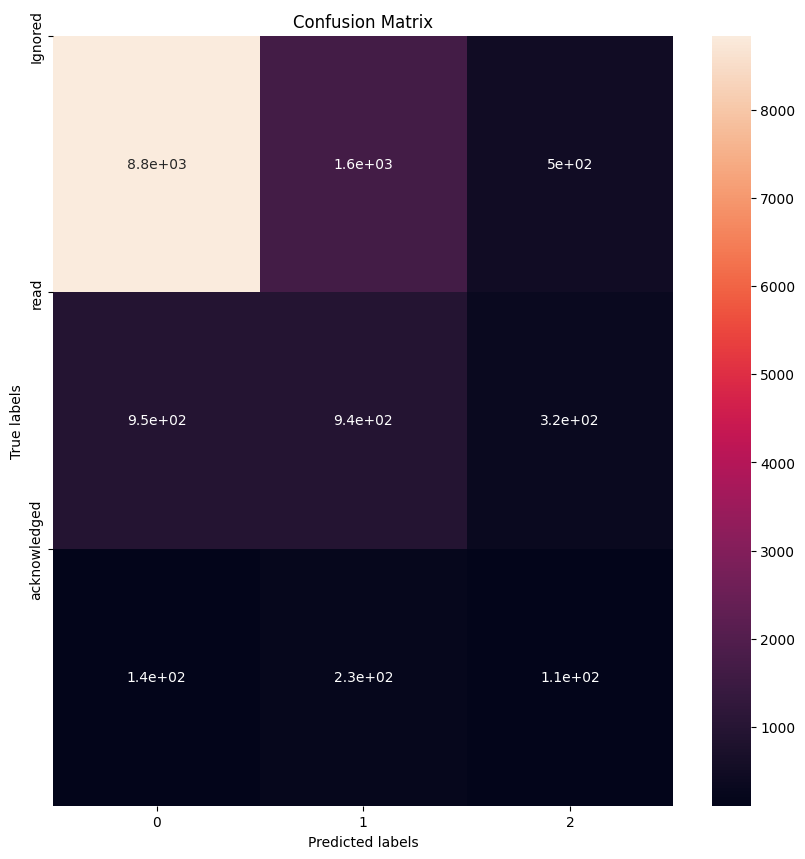

In [153]:
#Plot the matrix
cfu = confusion_matrix(y_test, pred_rmf_test_opt)
print(cfu)
plt.figure(figsize=(10, 10))
plt.subplot()
sns.heatmap(cfu, annot=True) #annot=True to annotate cells

# labels, title and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.yticks(ticks=[0,1,2], labels = ['Ignored','read','acknowledged'])
plt.show()

In [154]:
best_rmf_classifier1 = RandomForestClassifier(**best_params_rmf)
best_rmf_classifier1.fit(X_smt, y_smt)
pred_rmf_train_opt = best_rmf_classifier1.predict(X_smt)
pred_proba_rmf_train_opt= best_rmf_classifier.predict_proba(X_smt)

In [155]:
print("Accuracy on train data:", accuracy_score(y_smt, pred_rmf_train_opt))
print("Precision on train data:", precision_score(y_smt, pred_rmf_train_opt, average = 'weighted'))
print("Recall on train data:", recall_score(y_smt, pred_rmf_train_opt, average = 'weighted'))
print("F1 score on train data:", f1_score(y_smt, pred_rmf_train_opt, average = 'weighted'))
print("ROC AUC on train data:", roc_auc_score(y_smt, pred_proba_rmf_train_opt, multi_class='ovr'))

Accuracy on train data: 0.8465671098160626
Precision on train data: 0.8456282893169822
Recall on train data: 0.8465671098160626
F1 score on train data: 0.8455388604841063
ROC AUC on train data: 0.9587214508525831


In [156]:
f1_rmf_optimised_test =f1_score(y_test,pred_rmf_test_opt, average = 'weighted')
f1_rmf_optimised_train = f1_score(y_smt, pred_rmf_train_opt, average = 'weighted')
rmf_optimised_df= pd.DataFrame([{'Random Forest Classifier test': f1_rmf_optimised_test,'Random Forest Classifier train': f1_rmf_optimised_train}])

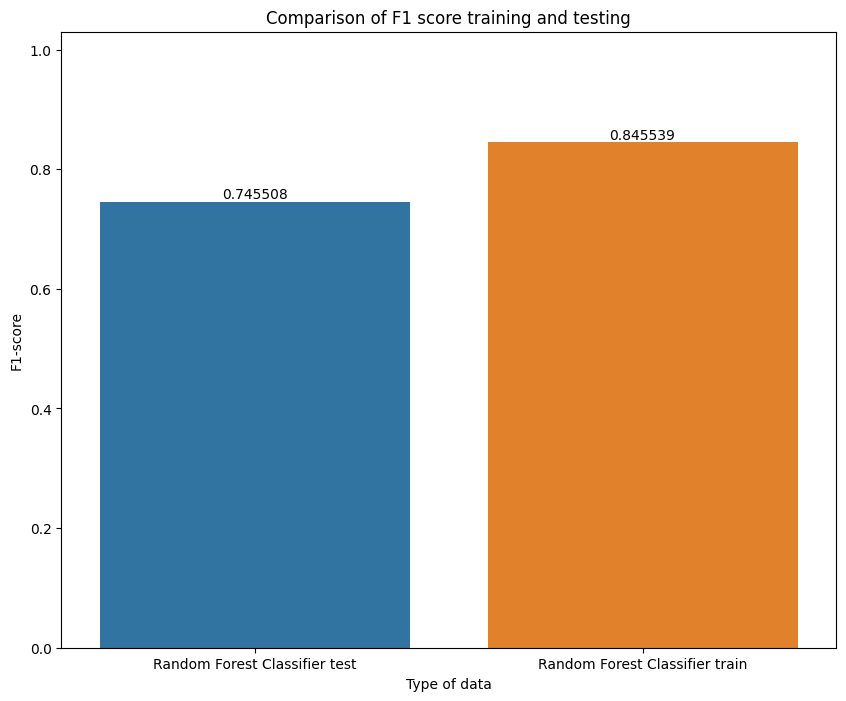

In [157]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 8))
graph = sns.barplot(data=rmf_optimised_df)
for bar in graph.containers:
    graph.bar_label(bar)
plt.title('Comparison of F1 score training and testing')
plt.ylim(0,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used **Random Search CV** for optimization because it reduce computation time compared to exhaustive methods like GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. It reduced the problem of overfitting. After hypertuning F1 Score of test data is 0.744 and training data is 0.846 which was earlier approx 0.99

### ML Model 2 - Decision Tree Classifier

In [158]:
# ML Model - 1 Implementation
dt_model = DecisionTreeClassifier()

# Fit the Algorithm
dt_model.fit(X_smt, y_smt)

# Predict on the model
pred_test_dt = dt_model.predict(X_test)
pred_proba_test_dt = dt_model.predict_proba(X_test)

In [159]:
#Checking the evaluation metrices on test data
print("Accuracy on test data:", accuracy_score(y_test, pred_test_dt))
print("Precision on test data:", precision_score(y_test, pred_test_dt, average = 'weighted'))
print("Recall on test data:", recall_score(y_test, pred_test_dt, average = 'weighted'))
print("F1 score on test data:", f1_score(y_test, pred_test_dt, average = 'weighted'))
print("ROC AUC on test data:", roc_auc_score(y_test, pred_proba_test_dt, multi_class='ovr'))

Accuracy on test data: 0.6933889743026576
Precision on test data: 0.726812432347178
Recall on test data: 0.6933889743026576
F1 score on test data: 0.7088471967632146
ROC AUC on test data: 0.5752191490624784


In [160]:
dt_model_train = DecisionTreeClassifier()

# Fit the Algorithm
dt_model_train.fit(X_smt, y_smt)

pred_train_dt= dt_model_train.predict(X_smt)
pred_proba_train_dt= dt_model_train.predict_proba(X_smt)

In [161]:
#Checking the evaluation metrices on test data
print("Accuracy on train data:", accuracy_score(y_smt, pred_train_dt))
print("Precision on train data:", precision_score(y_smt, pred_train_dt, average = 'weighted'))
print("Recall on train data:", recall_score(y_smt, pred_train_dt, average = 'weighted'))
print("F1 score on train data:", f1_score(y_smt, pred_train_dt, average = 'weighted'))
print("ROC AUC on train data:", roc_auc_score(y_smt, pred_proba_train_dt, multi_class='ovr'))

Accuracy on train data: 0.9971847872275845
Precision on train data: 0.9971982310557398
Recall on train data: 0.9971847872275845
F1 score on train data: 0.9971857264741041
ROC AUC on train data: 0.9999911198077497


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* A Decision Tree Classifier is a supervised machine learning algorithm used for classification tasks. It is easy to understand and interpret handles both numerical and categorical data.

* I have used F1 Score to compare performance of model on training and testing data

* The F1 Score for test data is 0.711 and for train data it is 0.997. This clearly shows that the model is quite overfitted.

In [162]:
f1_dt_test = f1_score(y_test, pred_test_dt, average = 'weighted')
f1_dt_train = f1_score(y_smt, pred_train_dt, average = 'weighted')
dt_df = pd.DataFrame([{'Decision Tree Classifier test': f1_dt_test,'Decision Tree Classifier train': f1_dt_train}])

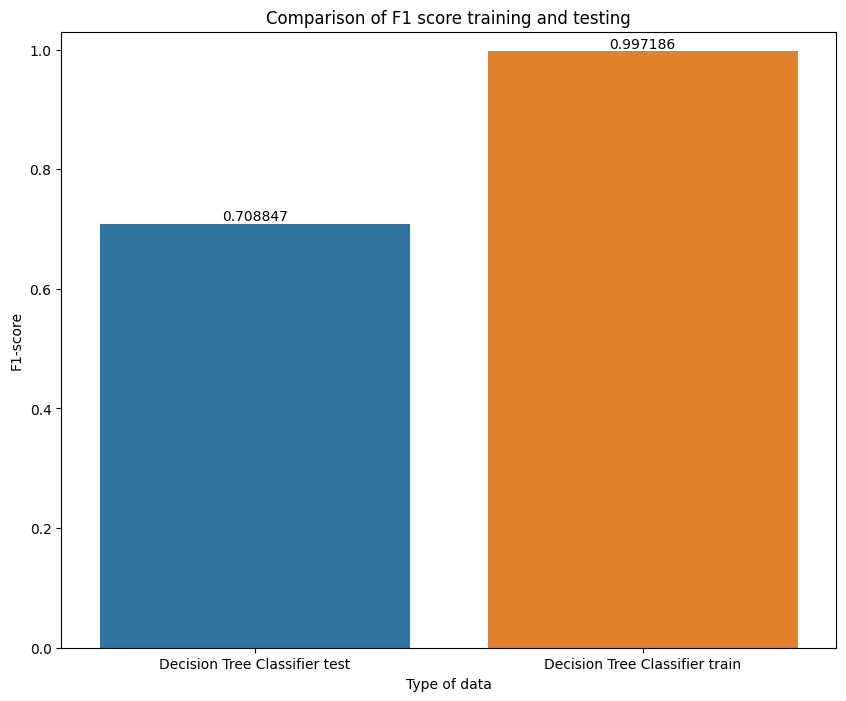

In [163]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 8))
graph = sns.barplot(data=dt_df)
for bar in graph.containers:
    graph.bar_label(bar)
plt.title('Comparison of F1 score training and testing')
plt.ylim(0,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [164]:
dt_classifier = DecisionTreeClassifier()

# Initialize RandomizedSearchCV
param_dist = {'max_depth': [10,20,30],'min_samples_split': [40,50],'max_features': ['log2'],
              'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy']  }

randomizedsearchcv = RandomizedSearchCV(dt_classifier, param_distributions = param_dist, n_iter=10, cv=2, scoring='f1', verbose=2, n_jobs=-1, random_state=42)

# Fit the Algorithm
randomizedsearchcv.fit(X_smt, y_smt)

# Access best parameters and best score
best_params = randomizedsearchcv.best_params_


Fitting 2 folds for each of 10 candidates, totalling 20 fits


In [165]:
best_params

{'splitter': 'best',
 'min_samples_split': 40,
 'max_features': 'log2',
 'max_depth': 30,
 'criterion': 'gini'}

In [166]:
best_dt_classifier = DecisionTreeClassifier(**best_params)
best_dt_classifier.fit(X_smt, y_smt)
pred_test_dt_opt = best_dt_classifier.predict(X_test)
pred_proba_test_dt_opt = best_dt_classifier.predict_proba(X_test)

In [167]:
#Checking the evaluation metrices on test data
print("Accuracy on test data:", accuracy_score(y_test, pred_test_dt_opt))
print("Precision on test data:", precision_score(y_test, pred_test_dt_opt, average = 'weighted'))
print("Recall on test data:", recall_score(y_test, pred_test_dt_opt, average = 'weighted'))
print("F1 score on test data:", f1_score(y_test, pred_test_dt_opt, average = 'weighted'))
print("ROC AUC on test data:", roc_auc_score(y_test, pred_proba_test_dt_opt, multi_class='ovr'))

Accuracy on test data: 0.67186470459038
Precision on test data: 0.7522968408455688
Recall on test data: 0.67186470459038
F1 score on test data: 0.7056043978644565
ROC AUC on test data: 0.6722238321767163


In [168]:
best_dt_classifier1 = DecisionTreeClassifier(**best_params)
best_dt_classifier1.fit(X_smt, y_smt)
pred_train_dt_opt = best_dt_classifier1.predict(X_smt)
pred_proba_train_dt_opt= best_dt_classifier.predict_proba(X_smt)

In [169]:
print("Accuracy on train data:", accuracy_score(y_smt, pred_train_dt_opt))
print("Precision on train data:", precision_score(y_smt, pred_train_dt_opt, average = 'weighted'))
print("Recall on train data:", recall_score(y_smt, pred_train_dt_opt, average = 'weighted'))
print("F1 score on train data:", f1_score(y_smt, pred_train_dt_opt, average = 'weighted'))
print("ROC AUC on train data:", roc_auc_score(y_smt, pred_proba_train_dt_opt, multi_class='ovr'))

Accuracy on train data: 0.7983518484793298
Precision on train data: 0.7974286381595621
Recall on train data: 0.7983518484793298
F1 score on train data: 0.7977041911445844
ROC AUC on train data: 0.9409129117681276


[[8208 1977  798]
 [1001  864  338]
 [ 173  195  105]]


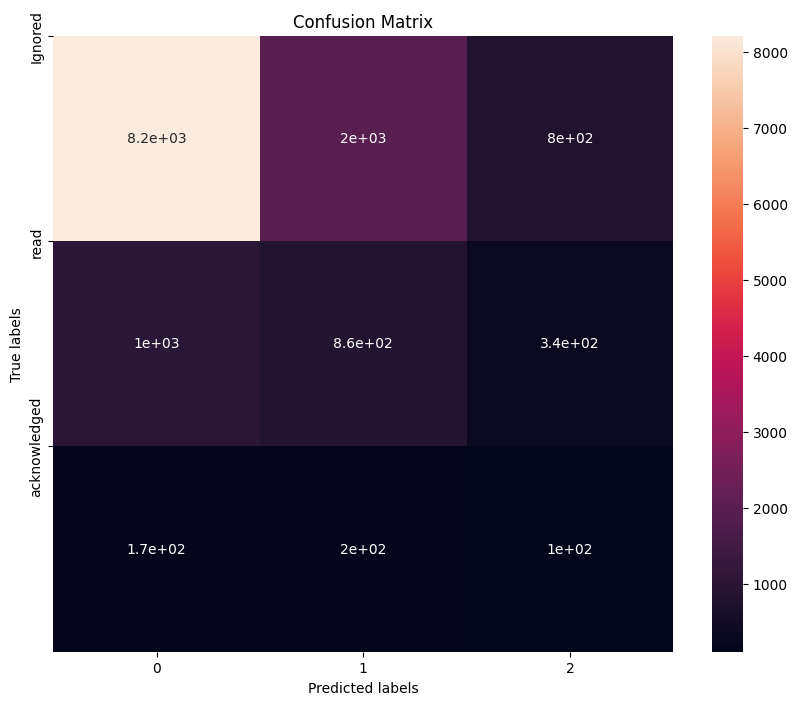

In [172]:
#Plot the matrix
cfu = confusion_matrix(y_test, pred_test_dt_opt)
print(cfu)
plt.figure(figsize=(10, 8))
plt.subplot()
sns.heatmap(cfu, annot=True) #annot=True to annotate cells

# labels, title and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.yticks(ticks=[0,1,2], labels = ['Ignored','read','acknowledged'])
plt.show()

In [173]:
f1_dt_optimised_test =f1_score(y_test, pred_test_dt_opt, average = 'weighted')
f1_dt_optimised_train = f1_score(y_smt, pred_train_dt_opt, average = 'weighted')
dt_optimised_df = pd.DataFrame([{'Decision Tree Classifier test': f1_dt_optimised_test,'Decision Tree Classifier train': f1_dt_optimised_train}])

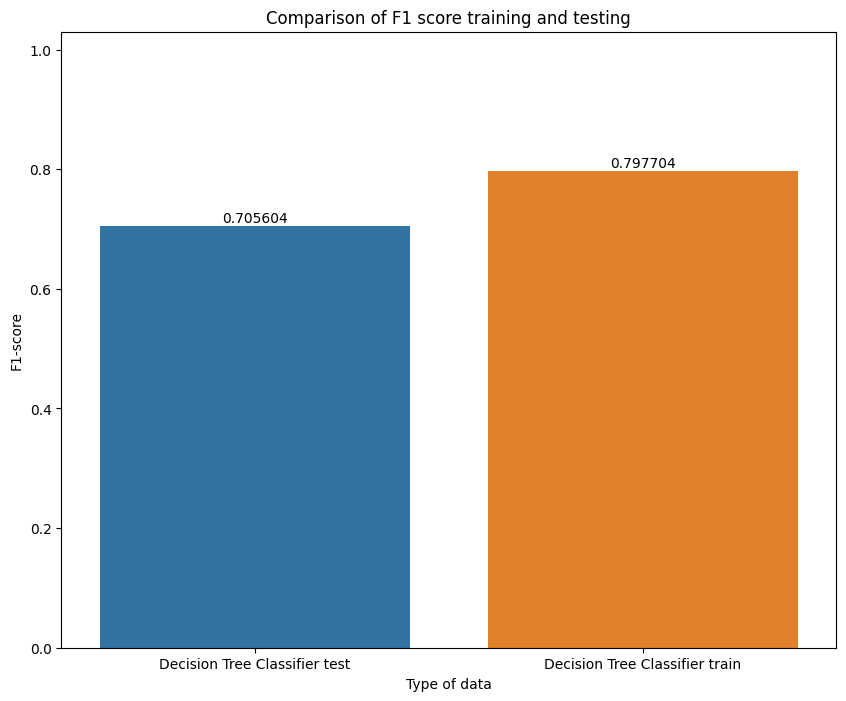

In [174]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 8))
graph = sns.barplot(data=dt_optimised_df)
for bar in graph.containers:
    graph.bar_label(bar)
plt.title('Comparison of F1 score training and testing')
plt.ylim(0,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used **Random Search CV** for optimization because it reduce computation time compared to exhaustive methods like GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. It reduced the problem of overfitting. After hypertuning F1 Score of test data is 0.702 and training data is 0.802 which was earlier approx 0.99

### ML Model 3 - KNN

In [175]:
# ML Model - 1 Implementation
Knn_model = KNeighborsClassifier()

# Fit the Algorithm
Knn_model.fit(X_smt, y_smt)

# Predict on the model
pred_test_knn = Knn_model.predict(X_test)
pred_proba_test_knn = Knn_model.predict_proba(X_test)

In [176]:
#Checking the evaluation metrices on test data
print("Accuracy on test data:", accuracy_score(y_test, pred_test_knn))
print("Precision on test data:", precision_score(y_test, pred_test_knn, average = 'weighted'))
print("Recall on test data:", recall_score(y_test, pred_test_knn, average = 'weighted'))
print("F1 score on test data:", f1_score(y_test, pred_test_knn, average = 'weighted'))
print("ROC AUC on test data:", roc_auc_score(y_test, pred_proba_test_knn, multi_class='ovr'))

Accuracy on test data: 0.6033384581594553
Precision on test data: 0.750990431204024
Recall on test data: 0.6033384581594553
F1 score on test data: 0.6567273847814395
ROC AUC on test data: 0.6357687710482968


In [177]:
Knn_model_train = KNeighborsClassifier()

# Fit the Algorithm
Knn_model_train.fit(X_smt, y_smt)

pred_train_knn = Knn_model_train.predict(X_smt)
pred_proba_train_knn= Knn_model_train.predict_proba(X_smt)

In [178]:
#Checking the evaluation metrices on test data
print("Accuracy on train data:", accuracy_score(y_smt, pred_train_knn))
print("Precision on train data:", precision_score(y_smt, pred_train_knn, average = 'weighted'))
print("Recall on train data:", recall_score(y_smt, pred_train_knn, average = 'weighted'))
print("F1 score on train data:", f1_score(y_smt, pred_train_knn, average = 'weighted'))
print("ROC AUC on train data:", roc_auc_score(y_smt, pred_proba_train_knn, multi_class='ovr'))

Accuracy on train data: 0.8833394038730044
Precision on train data: 0.8917907575630705
Recall on train data: 0.8833394038730044
F1 score on train data: 0.8808722754718638
ROC AUC on train data: 0.9827834513334558


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

K-Nearest Neighbors (KNN) is a simple, yet effective, supervised machine learning algorithm used for both classification and regression tasks.

I have used F1 Score to compare performance of model on training and testing data

The F1 Score for test data is 0.656 and for train data it is 0.880. This clearly shows that the model is quite overfitted.

In [179]:
f1_knn_test = f1_score(y_test, pred_test_knn, average = 'weighted')
f1_knn_train = f1_score(y_smt, pred_train_knn, average = 'weighted')
knn_df = pd.DataFrame([{'Knn Classifier test': f1_knn_test,'Knn Classifier train': f1_knn_train}])

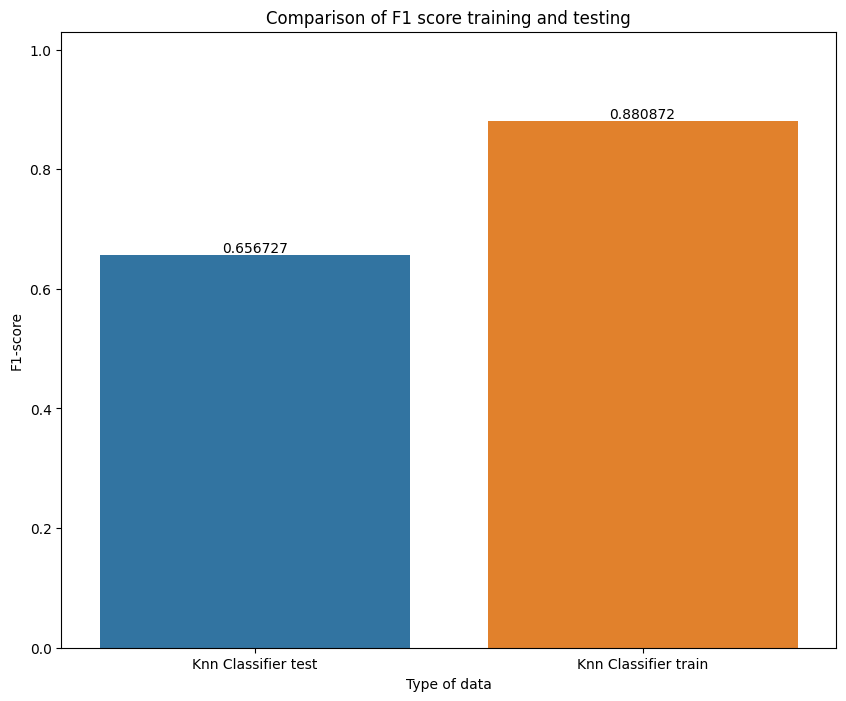

In [180]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 8))
graph = sns.barplot(data=knn_df)
for bar in graph.containers:
    graph.bar_label(bar)
plt.title('Comparison of F1 score training and testing')
plt.ylim(0,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [181]:
## Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

param_dist = {
    'n_neighbors': [12,15,20],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'p': [1, 2]}  # Power parameter for Minkowski distance

# Initialize RandomizedSearchCV

randomizedsearchcv = RandomizedSearchCV(knn_classifier, param_distributions = param_dist, n_iter=50, cv=3, scoring='f1', verbose=2, n_jobs=-1, random_state=42)
randomizedsearchcv.fit(X_smt, y_smt)

# Access best parameters and best score
best_params = randomizedsearchcv.best_params_


Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [182]:
best_params

{'weights': 'uniform', 'p': 1, 'n_neighbors': 12}

In [183]:
best_knn_classifier = KNeighborsClassifier(**best_params)
best_knn_classifier.fit(X_smt, y_smt)
pred_test_knn_opt = best_knn_classifier.predict(X_test)
pred_proba_test_knn_opt = best_knn_classifier.predict_proba(X_test)

In [184]:
#Checking the evaluation metrices on test data
print("Accuracy on test data:", accuracy_score(y_test, pred_test_knn_opt))
print("Precision on test data:", precision_score(y_test, pred_test_knn_opt, average = 'weighted'))
print("Recall on test data:", recall_score(y_test, pred_test_knn_opt, average = 'weighted'))
print("F1 score on test data:", f1_score(y_test, pred_test_knn_opt, average = 'weighted'))
print("ROC AUC on test data:", roc_auc_score(y_test, pred_proba_test_knn_opt, multi_class='ovr'))

Accuracy on test data: 0.6246430924665056
Precision on test data: 0.7621860055723244
Recall on test data: 0.6246430924665056
F1 score on test data: 0.6762221256881803
ROC AUC on test data: 0.6737402124595239


In [185]:
best_knn_classifier1 =KNeighborsClassifier(**best_params)
best_knn_classifier1.fit(X_smt, y_smt)
pred_train_knn_opt = best_knn_classifier1.predict(X_smt)
pred_proba_train_knn_opt= best_knn_classifier.predict_proba(X_smt)

In [186]:
print("Accuracy on train data:", accuracy_score(y_smt, pred_train_knn_opt))
print("Precision on train data:", precision_score(y_smt, pred_train_knn_opt, average = 'weighted'))
print("Recall on train data:", recall_score(y_smt, pred_train_knn_opt, average = 'weighted'))
print("F1 score on train data:", f1_score(y_smt, pred_train_knn_opt, average = 'weighted'))
print("ROC AUC on train data:", roc_auc_score(y_smt, pred_proba_train_knn_opt, multi_class='ovr'))

Accuracy on train data: 0.8377041218964366
Precision on train data: 0.8401452331388637
Recall on train data: 0.8377041218964366
F1 score on train data: 0.8353866003294085
ROC AUC on train data: 0.9592773789578916


[[7437 2451 1095]
 [ 785  953  465]
 [ 121  210  142]]


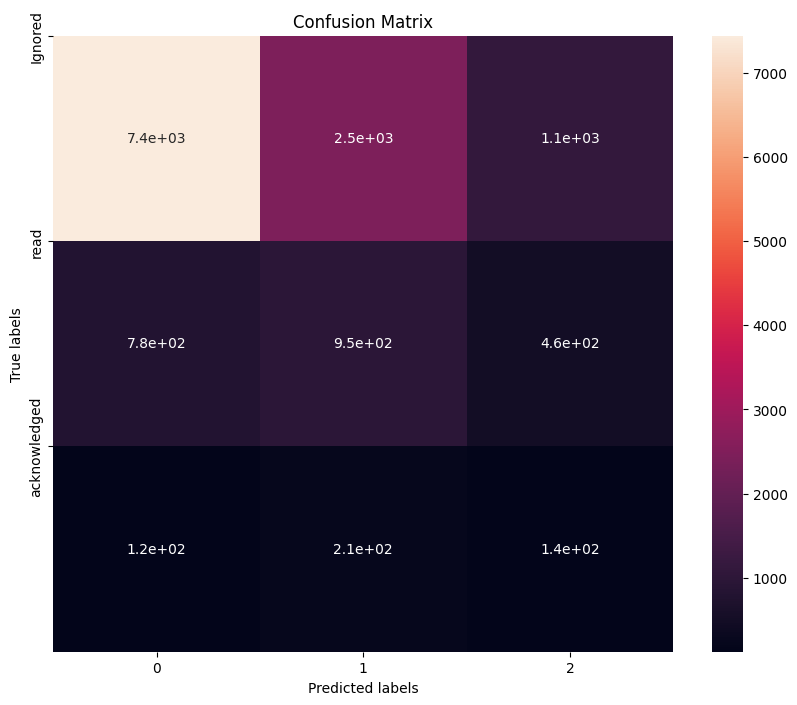

In [187]:
#Plot the matrix
cfu = confusion_matrix(y_test, pred_test_knn_opt)
print(cfu)
plt.figure(figsize=(10, 8))
plt.subplot()
sns.heatmap(cfu, annot=True) #annot=True to annotate cells

# labels, title and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.yticks(ticks=[0,1,2], labels = ['Ignored','read','acknowledged'])
plt.show()

In [188]:
f1_knn_optimised_test =f1_score(y_test, pred_test_knn_opt, average = 'weighted')
f1_knn_optimised_train = f1_score(y_smt, pred_train_knn_opt, average = 'weighted')
knn_optimised_df= pd.DataFrame([{'knn Classifier test': f1_knn_optimised_test,'knn Classifier train': f1_knn_optimised_train}])

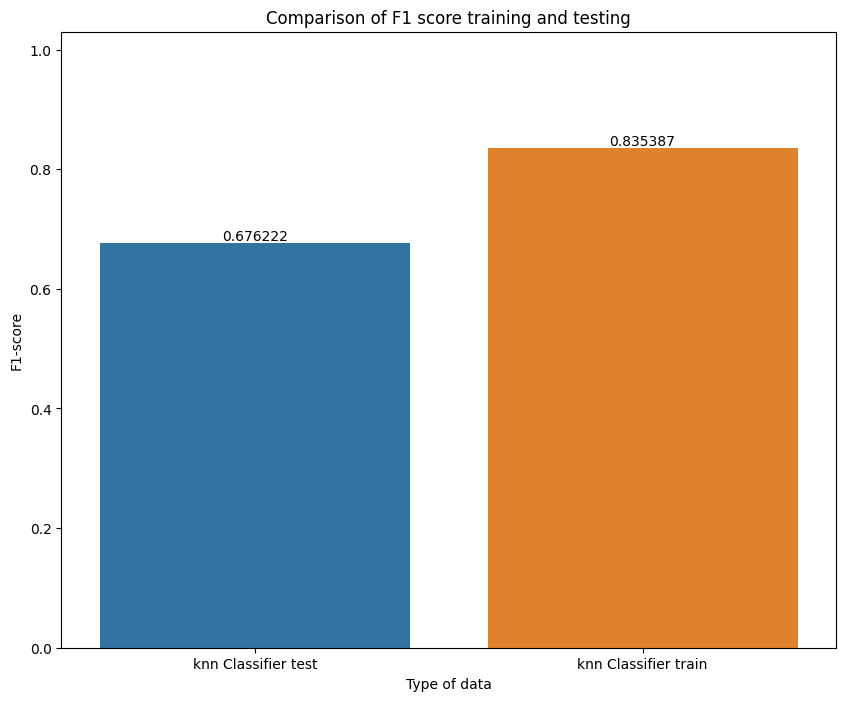

In [189]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 8))
graph = sns.barplot(data=knn_optimised_df)
for bar in graph.containers:
    graph.bar_label(bar)
plt.title('Comparison of F1 score training and testing')
plt.ylim(0,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used **Random Search CV** for optimization because it reduce computation time compared to exhaustive methods like GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. It reduced the problem of overfitting. After hypertuning F1 Score of test data is 0.676 and training data is 0.835 which was earlier approx 0.99. But it also reduced models performance in test data

### ML Model 4 - CatBoost Classifier

In [190]:
# ML Model - 1 Implementation
cbt_model = CatBoostClassifier()

# Fit the Algorithm
cbt_model.fit(X_smt, y_smt)

# Predict on the model
pred_test_cbt = cbt_model.predict(X_test)
pred_proba_test_cbt = cbt_model.predict_proba(X_test)

Learning rate set to 0.101493
0:	learn: 1.0698984	total: 82.5ms	remaining: 1m 22s
1:	learn: 1.0465642	total: 138ms	remaining: 1m 9s
2:	learn: 1.0263906	total: 197ms	remaining: 1m 5s
3:	learn: 1.0092243	total: 255ms	remaining: 1m 3s
4:	learn: 0.9957187	total: 312ms	remaining: 1m 2s
5:	learn: 0.9838579	total: 364ms	remaining: 1m
6:	learn: 0.9730174	total: 444ms	remaining: 1m 3s
7:	learn: 0.9640302	total: 501ms	remaining: 1m 2s
8:	learn: 0.9568753	total: 553ms	remaining: 1m
9:	learn: 0.9505447	total: 606ms	remaining: 60s
10:	learn: 0.9443343	total: 666ms	remaining: 59.9s
11:	learn: 0.9389563	total: 729ms	remaining: 1m
12:	learn: 0.9339647	total: 800ms	remaining: 1m
13:	learn: 0.9296326	total: 855ms	remaining: 1m
14:	learn: 0.9265459	total: 914ms	remaining: 1m
15:	learn: 0.9237098	total: 968ms	remaining: 59.5s
16:	learn: 0.9185220	total: 1.04s	remaining: 60s
17:	learn: 0.9143668	total: 1.09s	remaining: 59.5s
18:	learn: 0.9114067	total: 1.15s	remaining: 59.3s
19:	learn: 0.9087947	total: 1.2

In [191]:
#Checking the evaluation metrices on test data
print("Accuracy on test data:", accuracy_score(y_test, pred_test_cbt))
print("Precision on test data:", precision_score(y_test, pred_test_cbt, average = 'weighted'))
print("Recall on test data:", recall_score(y_test, pred_test_cbt, average = 'weighted'))
print("F1 score on test data:", f1_score(y_test, pred_test_cbt, average = 'weighted'))
print("ROC AUC on test data:", roc_auc_score(y_test, pred_proba_test_cbt, multi_class='ovr'))


Accuracy on test data: 0.7939819898967714
Precision on test data: 0.7582378999994821
Recall on test data: 0.7939819898967714
F1 score on test data: 0.7716259545293511
ROC AUC on test data: 0.7723973075042193


In [192]:
cbt_model_train = CatBoostClassifier()

# Fit the Algorithm
cbt_model_train.fit(X_smt, y_smt)

pred_train_cbt = cbt_model_train.predict(X_smt)
pred_proba_train_cbt= cbt_model_train.predict_proba(X_smt)

Learning rate set to 0.101493
0:	learn: 1.0698984	total: 155ms	remaining: 2m 34s
1:	learn: 1.0465642	total: 297ms	remaining: 2m 27s
2:	learn: 1.0263906	total: 422ms	remaining: 2m 20s
3:	learn: 1.0092243	total: 537ms	remaining: 2m 13s
4:	learn: 0.9957187	total: 664ms	remaining: 2m 12s
5:	learn: 0.9838579	total: 792ms	remaining: 2m 11s
6:	learn: 0.9730174	total: 941ms	remaining: 2m 13s
7:	learn: 0.9640302	total: 1.09s	remaining: 2m 15s
8:	learn: 0.9568753	total: 1.22s	remaining: 2m 14s
9:	learn: 0.9505447	total: 1.39s	remaining: 2m 17s
10:	learn: 0.9443343	total: 1.57s	remaining: 2m 21s
11:	learn: 0.9389563	total: 1.73s	remaining: 2m 22s
12:	learn: 0.9339647	total: 1.88s	remaining: 2m 22s
13:	learn: 0.9296326	total: 2s	remaining: 2m 20s
14:	learn: 0.9265459	total: 2.17s	remaining: 2m 22s
15:	learn: 0.9237098	total: 2.31s	remaining: 2m 22s
16:	learn: 0.9185220	total: 2.44s	remaining: 2m 21s
17:	learn: 0.9143668	total: 2.6s	remaining: 2m 22s
18:	learn: 0.9114067	total: 2.74s	remaining: 2m 

In [193]:
#Checking the evaluation metrices on test data
print("Accuracy on train data:", accuracy_score(y_smt, pred_train_cbt))
print("Precision on train data:", precision_score(y_smt, pred_train_cbt, average = 'weighted'))
print("Recall on train data:", recall_score(y_smt, pred_train_cbt, average = 'weighted'))
print("F1 score on train data:", f1_score(y_smt, pred_train_cbt, average = 'weighted'))
print("ROC AUC on train data:", roc_auc_score(y_smt, pred_proba_train_cbt, multi_class='ovr'))

Accuracy on train data: 0.8042402719601772
Precision on train data: 0.8017210077062757
Recall on train data: 0.8042402719601772
F1 score on train data: 0.7990245690519436
ROC AUC on train data: 0.9283069530015359


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

CatBoost is a gradient boosting library it includes various methods to control overfitting, such as regularization and the use of different loss functions.

I have used F1 Score to compare performance of model on training and testing data

The F1 Score for test data is 0.771 and for train data it is 0.799. This clearly shows that the model is performing well, though there is little bit overfitting.

In [194]:
f1_cbt_test = f1_score(y_test, pred_test_cbt, average = 'weighted')
f1_cbt_train = f1_score(y_smt, pred_train_cbt, average = 'weighted')
cbt_df= pd.DataFrame([{'Catboost Classifier test': f1_cbt_test,'Catboost Classifier train': f1_cbt_train}])

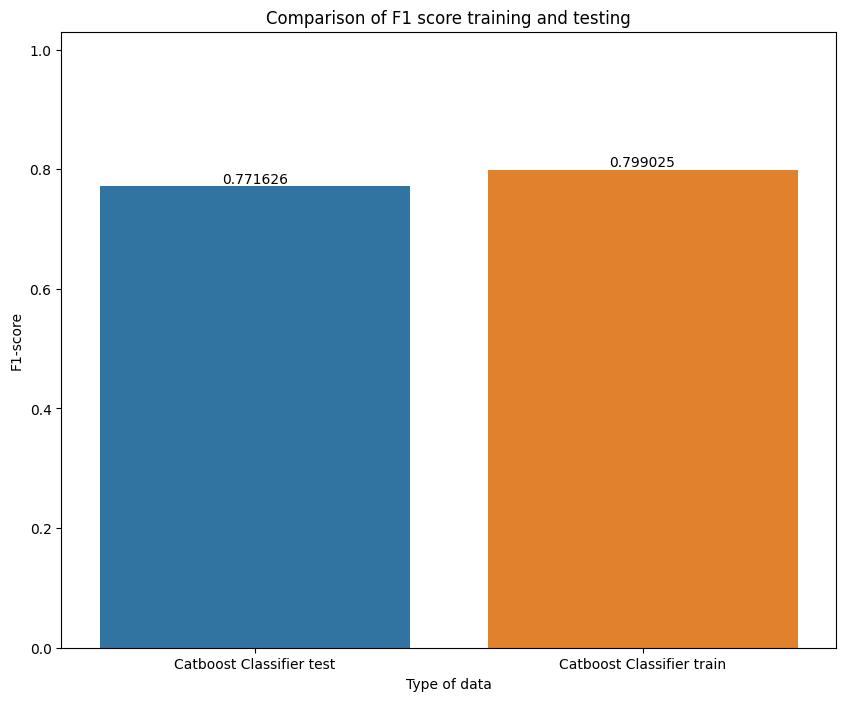

In [195]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 8))
graph = sns.barplot(data=cbt_df)
for bar in graph.containers:
    graph.bar_label(bar)
plt.title('Comparison of F1 score training and testing')
plt.ylim(0,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [196]:
cbt_classifier = CatBoostClassifier()

param_dist= {
    'learning_rate': uniform(0.01, 0.2),
    'depth': [3,4,5],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

randomizedsearchcv = RandomizedSearchCV(cbt_classifier, param_distributions=param_dist, n_iter=10, cv=3, scoring='f1', verbose=2, n_jobs=-1, random_state=42)
randomizedsearchcv.fit(X_smt, y_smt)

# Access best parameters and best score
best_params = randomizedsearchcv.best_params_


Fitting 3 folds for each of 10 candidates, totalling 30 fits
0:	learn: 1.0485072	total: 56.5ms	remaining: 56.5s
1:	learn: 1.0128136	total: 106ms	remaining: 52.7s
2:	learn: 0.9875800	total: 156ms	remaining: 51.9s
3:	learn: 0.9706742	total: 204ms	remaining: 50.7s
4:	learn: 0.9566090	total: 251ms	remaining: 49.9s
5:	learn: 0.9461586	total: 303ms	remaining: 50.3s
6:	learn: 0.9394789	total: 356ms	remaining: 50.5s
7:	learn: 0.9333258	total: 408ms	remaining: 50.6s
8:	learn: 0.9270492	total: 457ms	remaining: 50.3s
9:	learn: 0.9215581	total: 513ms	remaining: 50.8s
10:	learn: 0.9162631	total: 578ms	remaining: 52s
11:	learn: 0.9109295	total: 624ms	remaining: 51.4s
12:	learn: 0.9069581	total: 671ms	remaining: 51s
13:	learn: 0.9014169	total: 726ms	remaining: 51.1s
14:	learn: 0.8959837	total: 791ms	remaining: 51.9s
15:	learn: 0.8922361	total: 837ms	remaining: 51.5s
16:	learn: 0.8881730	total: 884ms	remaining: 51.1s
17:	learn: 0.8865816	total: 935ms	remaining: 51s
18:	learn: 0.8819655	total: 983ms	re

In [197]:
best_params

{'depth': 5, 'l2_leaf_reg': 7, 'learning_rate': 0.20014286128198325}

In [198]:
best_cbt_classifier = CatBoostClassifier(**best_params)
best_cbt_classifier.fit(X_smt, y_smt)
pred_test_cbt_opt = best_cbt_classifier.predict(X_test)
pred_proba_test_cbt_opt = best_cbt_classifier.predict_proba(X_test)

0:	learn: 1.0485072	total: 71.8ms	remaining: 1m 11s
1:	learn: 1.0128136	total: 133ms	remaining: 1m 6s
2:	learn: 0.9875800	total: 180ms	remaining: 59.9s
3:	learn: 0.9706742	total: 227ms	remaining: 56.5s
4:	learn: 0.9566090	total: 278ms	remaining: 55.4s
5:	learn: 0.9461586	total: 325ms	remaining: 53.9s
6:	learn: 0.9394789	total: 376ms	remaining: 53.3s
7:	learn: 0.9333258	total: 424ms	remaining: 52.6s
8:	learn: 0.9270492	total: 476ms	remaining: 52.5s
9:	learn: 0.9215581	total: 527ms	remaining: 52.1s
10:	learn: 0.9162631	total: 575ms	remaining: 51.7s
11:	learn: 0.9109295	total: 634ms	remaining: 52.2s
12:	learn: 0.9069581	total: 683ms	remaining: 51.8s
13:	learn: 0.9014169	total: 739ms	remaining: 52s
14:	learn: 0.8959837	total: 790ms	remaining: 51.9s
15:	learn: 0.8922361	total: 837ms	remaining: 51.5s
16:	learn: 0.8881730	total: 884ms	remaining: 51.1s
17:	learn: 0.8865816	total: 931ms	remaining: 50.8s
18:	learn: 0.8819655	total: 979ms	remaining: 50.5s
19:	learn: 0.8771443	total: 1.03s	remaini

In [199]:
#Checking the evaluation metrices on test data
print("Accuracy on test data:", accuracy_score(y_test, pred_test_cbt_opt))
print("Precision on test data:", precision_score(y_test, pred_test_cbt_opt, average = 'weighted'))
print("Recall on test data:", recall_score(y_test, pred_test_cbt_opt, average = 'weighted'))
print("F1 score on test data:", f1_score(y_test, pred_test_cbt_opt, average = 'weighted'))
print("ROC AUC on test data:", roc_auc_score(y_test, pred_proba_test_cbt_opt, multi_class='ovr'))

Accuracy on test data: 0.7954462259316202
Precision on test data: 0.756657281168792
Recall on test data: 0.7954462259316202
F1 score on test data: 0.7704506146722205
ROC AUC on test data: 0.7702852555348542


In [200]:
best_cbt_classifier1 = CatBoostClassifier(**best_params)
best_cbt_classifier1.fit(X_smt, y_smt)
pred_train_cbt_opt = best_cbt_classifier1.predict(X_smt)
pred_proba_train_cbt_opt= best_cbt_classifier.predict_proba(X_smt)

0:	learn: 1.0485072	total: 66.7ms	remaining: 1m 6s
1:	learn: 1.0128136	total: 141ms	remaining: 1m 10s
2:	learn: 0.9875800	total: 189ms	remaining: 1m 2s
3:	learn: 0.9706742	total: 236ms	remaining: 58.7s
4:	learn: 0.9566090	total: 287ms	remaining: 57.1s
5:	learn: 0.9461586	total: 335ms	remaining: 55.5s
6:	learn: 0.9394789	total: 384ms	remaining: 54.5s
7:	learn: 0.9333258	total: 433ms	remaining: 53.6s
8:	learn: 0.9270492	total: 482ms	remaining: 53.1s
9:	learn: 0.9215581	total: 534ms	remaining: 52.8s
10:	learn: 0.9162631	total: 583ms	remaining: 52.4s
11:	learn: 0.9109295	total: 630ms	remaining: 51.8s
12:	learn: 0.9069581	total: 682ms	remaining: 51.8s
13:	learn: 0.9014169	total: 733ms	remaining: 51.6s
14:	learn: 0.8959837	total: 784ms	remaining: 51.5s
15:	learn: 0.8922361	total: 837ms	remaining: 51.5s
16:	learn: 0.8881730	total: 886ms	remaining: 51.2s
17:	learn: 0.8865816	total: 938ms	remaining: 51.2s
18:	learn: 0.8819655	total: 983ms	remaining: 50.7s
19:	learn: 0.8771443	total: 1.04s	remai

In [201]:
print("Accuracy on train data:", accuracy_score(y_smt, pred_train_cbt_opt))
print("Precision on train data:", precision_score(y_smt, pred_train_cbt_opt, average = 'weighted'))
print("Recall on train data:", recall_score(y_smt, pred_train_cbt_opt, average = 'weighted'))
print("F1 score on train data:", f1_score(y_smt, pred_train_cbt_opt, average = 'weighted'))
print("ROC AUC on train data:", roc_auc_score(y_smt, pred_proba_train_cbt_opt, multi_class='ovr'))

Accuracy on train data: 0.8106067504401141
Precision on train data: 0.8083021617979274
Recall on train data: 0.8106067504401141
F1 score on train data: 0.805645403655614
ROC AUC on train data: 0.9318735516481151


In [202]:
f1_cbt_optimised_test =f1_score(y_test, pred_test_cbt_opt, average = 'weighted')
f1_cbt_optimised_train = f1_score(y_smt, pred_train_cbt_opt, average = 'weighted')
cbt_optimised_df = pd.DataFrame([{'CatBoost Classifier test': f1_cbt_optimised_test,'CatBoost Classifier train': f1_cbt_optimised_train}])

[[10271   619    93]
 [ 1554   541   108]
 [  270   150    53]]


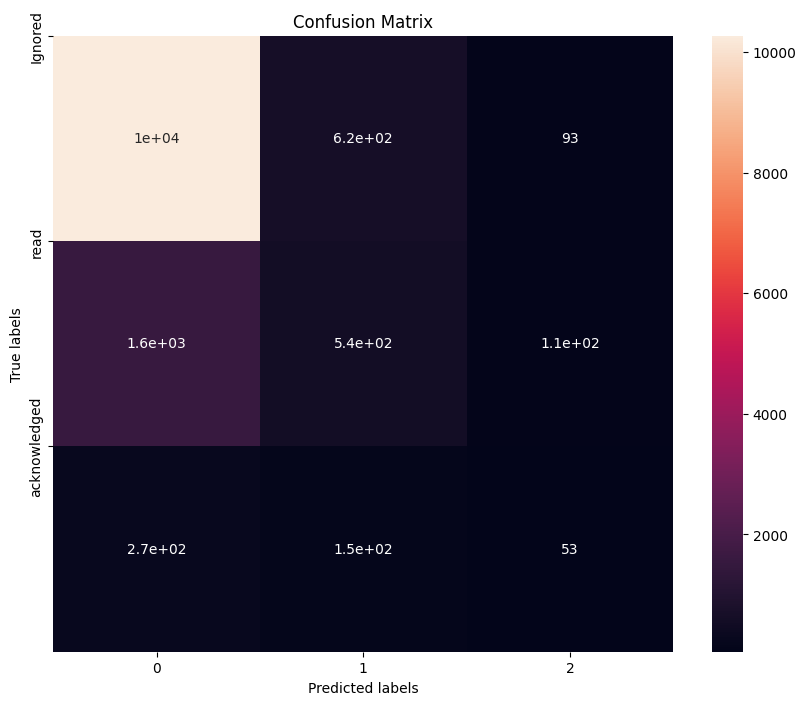

In [203]:
#Plot the matrix
cfu = confusion_matrix(y_test, pred_test_cbt_opt)
print(cfu)
plt.figure(figsize=(10, 8))
plt.subplot()
sns.heatmap(cfu, annot=True) #annot=True to annotate cells

# labels, title and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.yticks(ticks=[0,1,2], labels = ['Ignored','read','acknowledged'])
plt.show()

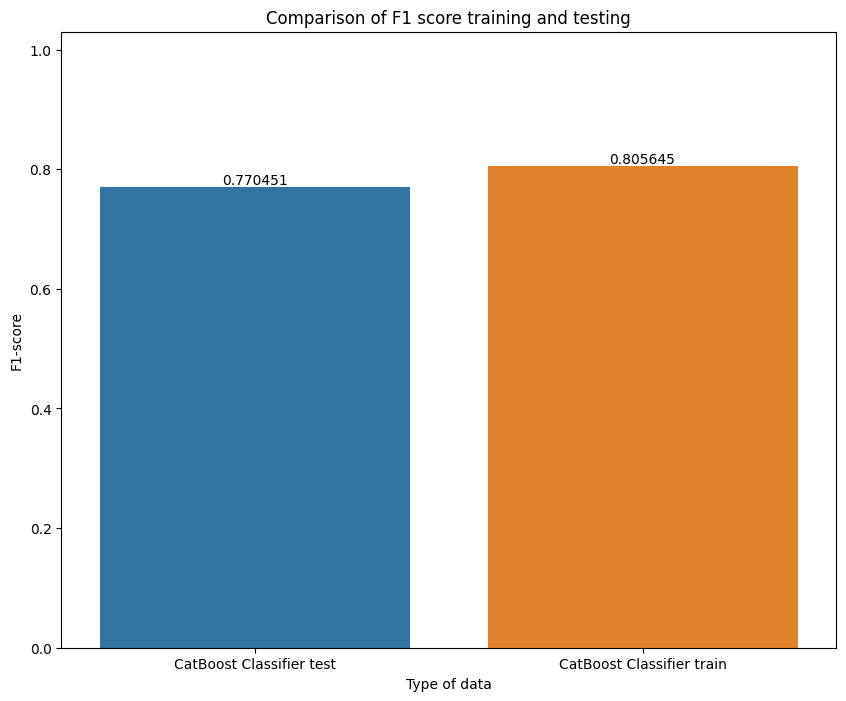

In [204]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 8))
graph = sns.barplot(data=cbt_optimised_df)
for bar in graph.containers:
    graph.bar_label(bar)
plt.title('Comparison of F1 score training and testing')
plt.ylim(0,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used **Random Search CV** for optimization because it reduce computation time compared to exhaustive methods like GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, After hypertunning problem of overfitting arised.

### ML Model 5-XG Boost Classifier

In [205]:
# ML Model - 1 Implementation
xgb_model = xgb.XGBClassifier()

# Fit the Algorithm
xgb_model.fit(X_smt, y_smt)

# Predict on the model
pred_test_xgb = xgb_model.predict(X_test)
pred_proba_test_xgb = xgb_model.predict_proba(X_test)

In [206]:
#Checking the evaluation metrices on test data
print("Accuracy on test data:", accuracy_score(y_test, pred_test_xgb))
print("Precision on test data:", precision_score(y_test, pred_test_xgb, average = 'weighted'))
print("Recall on test data:", recall_score(y_test, pred_test_xgb, average = 'weighted'))
print("F1 score on test data:", f1_score(y_test, pred_test_xgb, average = 'weighted'))
print("ROC AUC on test data:", roc_auc_score(y_test, pred_proba_test_xgb, multi_class='ovr'))

Accuracy on test data: 0.772823779193206
Precision on test data: 0.7614715574635659
Recall on test data: 0.772823779193206
F1 score on test data: 0.7655787253466128
ROC AUC on test data: 0.7590914496893775


In [207]:
xgb_model_train = xgb.XGBClassifier()

# Fit the Algorithm
xgb_model_train.fit(X_smt, y_smt)

pred_train_xgb = xgb_model_train.predict(X_smt)
pred_proba_train_xgb= xgb_model_train.predict_proba(X_smt)

In [208]:
#Checking the evaluation metrices on test data
print("Accuracy on train data:", accuracy_score(y_smt, pred_train_xgb))
print("Precision on train data:", precision_score(y_smt, pred_train_xgb, average = 'weighted'))
print("Recall on train data:", recall_score(y_smt, pred_train_xgb, average = 'weighted'))
print("F1 score on train data:", f1_score(y_smt, pred_train_xgb, average = 'weighted'))
print("ROC AUC on train data:", roc_auc_score(y_smt, pred_proba_train_xgb, multi_class='ovr'))

Accuracy on train data: 0.7949675226127603
Precision on train data: 0.7932409364549478
Recall on train data: 0.7949675226127603
F1 score on train data: 0.7903044396708062
ROC AUC on train data: 0.9263536003070669


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

XGBoost (Extreme Gradient Boosting) is a powerful and popular machine learning library for gradient boosting. It's widely used due to its efficiency, flexibility, and performance.

I have used F1 Score to compare performance of model on training and testing data

The F1 Score for test data is 0.765 and for train data it is 0.790. This clearly shows that the model is little bit overfitted.

In [209]:
f1_xgb_test = f1_score(y_test, pred_test_xgb, average = 'weighted')
f1_xgb_train = f1_score(y_smt, pred_train_xgb, average = 'weighted')
xgb_df = pd.DataFrame([{'XGBClassifier test': f1_xgb_test,'XGBClassifier train': f1_xgb_train}])

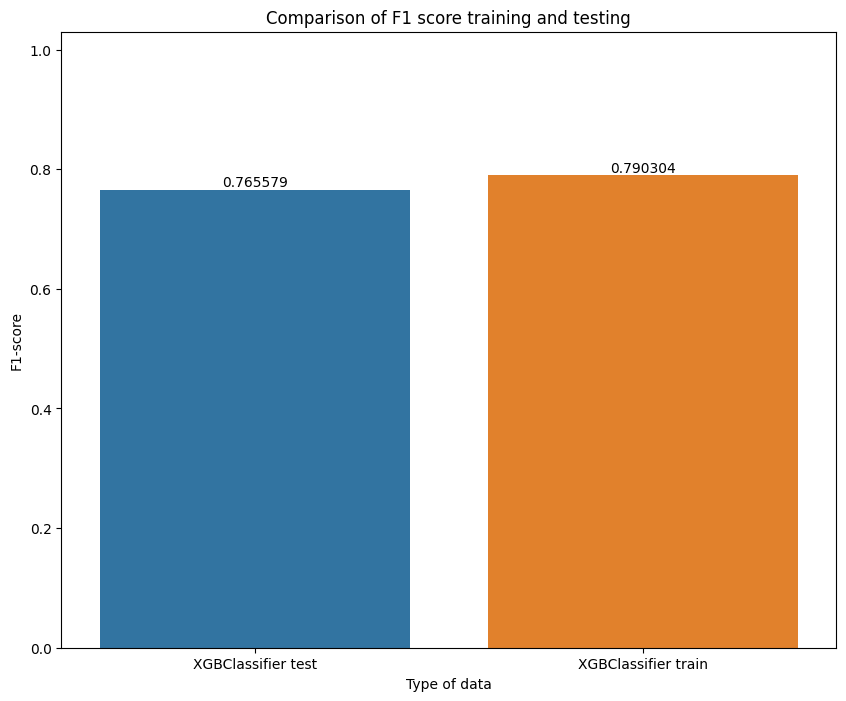

In [210]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 8))
graph = sns.barplot(data=xgb_df)
for bar in graph.containers:
    graph.bar_label(bar)
plt.title('Comparison of F1 score training and testing')
plt.ylim(0,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [211]:
xgb_classifier = xgb.XGBClassifier()

# param_dist= {'n_estimators': [50, 100, 200, 300],'max_depth' : [8,9,10]}
param_dist= {'n_estimators':[80,50,60],'max_depth' : [4,6,8], 'min_samples_split' : [50,100,150],'min_samples_leaf' : [30,40]}
randomizedsearchcv = RandomizedSearchCV(xgb_classifier, param_distributions = param_dist, n_iter=10, cv=5, scoring='f1', verbose=2, n_jobs=-1, random_state=20)
randomizedsearchcv.fit(X_smt, y_smt)

# Access best parameters and best score
best_params = randomizedsearchcv.best_params_


Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [212]:
best_params

{'n_estimators': 50,
 'min_samples_split': 100,
 'min_samples_leaf': 30,
 'max_depth': 4}

In [213]:
best_xgb_classifier = xgb.XGBClassifier(**best_params)
best_xgb_classifier.fit(X_smt, y_smt)
pred_test_xgb_opt = best_xgb_classifier.predict(X_test)
pred_proba_test_xgb_opt = best_xgb_classifier.predict_proba(X_test)

In [214]:
#Checking the evaluation metrices on test data
print("Accuracy on test data:", accuracy_score(y_test, pred_test_xgb_opt))
print("Precision on test data:", precision_score(y_test, pred_test_xgb_opt, average = 'weighted'))
print("Recall on test data:", recall_score(y_test, pred_test_xgb_opt, average = 'weighted'))
print("F1 score on test data:", f1_score(y_test, pred_test_xgb_opt, average = 'weighted'))
print("ROC AUC on test data:", roc_auc_score(y_test, pred_proba_test_xgb_opt, multi_class='ovr'))

Accuracy on test data: 0.7091295116772823
Precision on test data: 0.771674778219534
Recall on test data: 0.7091295116772823
F1 score on test data: 0.7361691471748603
ROC AUC on test data: 0.7657002960429606


In [215]:
best_xgb_classifier1 = xgb.XGBClassifier(**best_params)
best_xgb_classifier1.fit(X_smt, y_smt)
pred_train_xgb_opt = best_xgb_classifier1.predict(X_smt)
pred_proba_train_xgb_opt= best_xgb_classifier.predict_proba(X_smt)

In [216]:
print("Accuracy on train data:", accuracy_score(y_smt, pred_train_xgb_opt))
print("Precision on train data:", precision_score(y_smt, pred_train_xgb_opt, average = 'weighted'))
print("Recall on train data:", recall_score(y_smt, pred_train_xgb_opt, average = 'weighted'))
print("F1 score on train data:", f1_score(y_smt, pred_train_xgb_opt, average = 'weighted'))
print("ROC AUC on train data:", roc_auc_score(y_smt, pred_proba_train_xgb_opt, multi_class='ovr'))

Accuracy on train data: 0.6593137254901961
Precision on train data: 0.6517600591711592
Recall on train data: 0.6593137254901961
F1 score on train data: 0.6497796475225998
ROC AUC on train data: 0.8390856164666479


In [217]:
f1_xgb_optimised_test =f1_score(y_test, pred_test_xgb_opt, average = 'weighted')
f1_xgb_optimised_train = f1_score(y_smt, pred_train_xgb_opt, average = 'weighted')
xgb_optimised_df = pd.DataFrame([{'XGBClassifier test': f1_xgb_optimised_test,'XGBClassifier train': f1_xgb_optimised_train}])

[[8796 1355  832]
 [ 943  718  542]
 [ 139  162  172]]


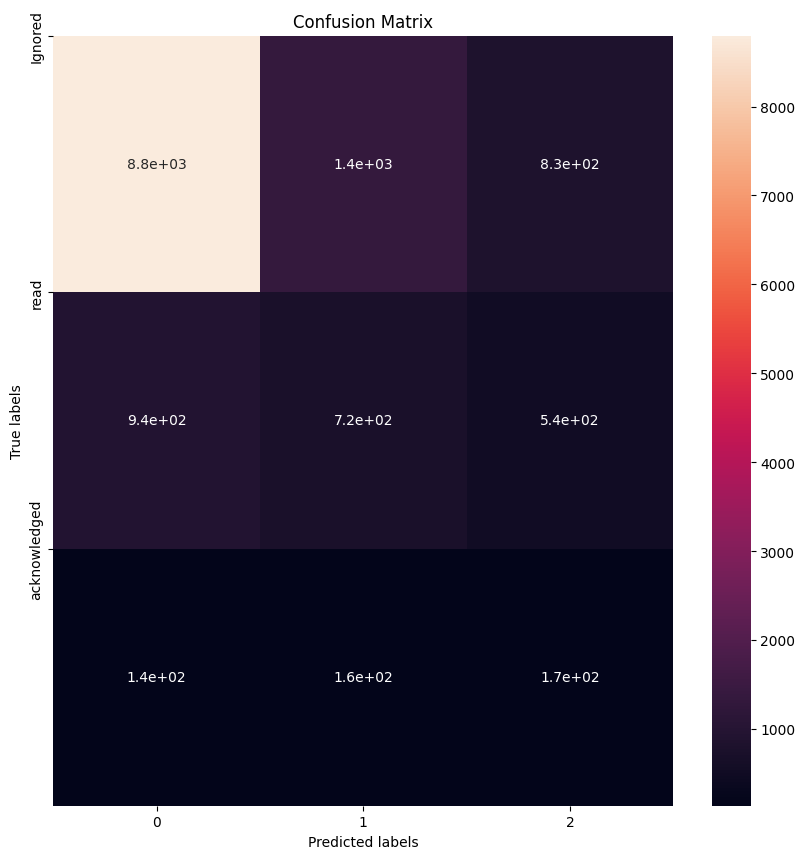

In [218]:
#Plot the matrix
cfu = confusion_matrix(y_test, pred_test_xgb_opt)
print(cfu)
plt.figure(figsize=(10, 10))
plt.subplot()
sns.heatmap(cfu, annot=True) #annot=True to annotate cells

# labels, title and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.yticks(ticks=[0,1,2], labels = ['Ignored','read','acknowledged'])
plt.show()

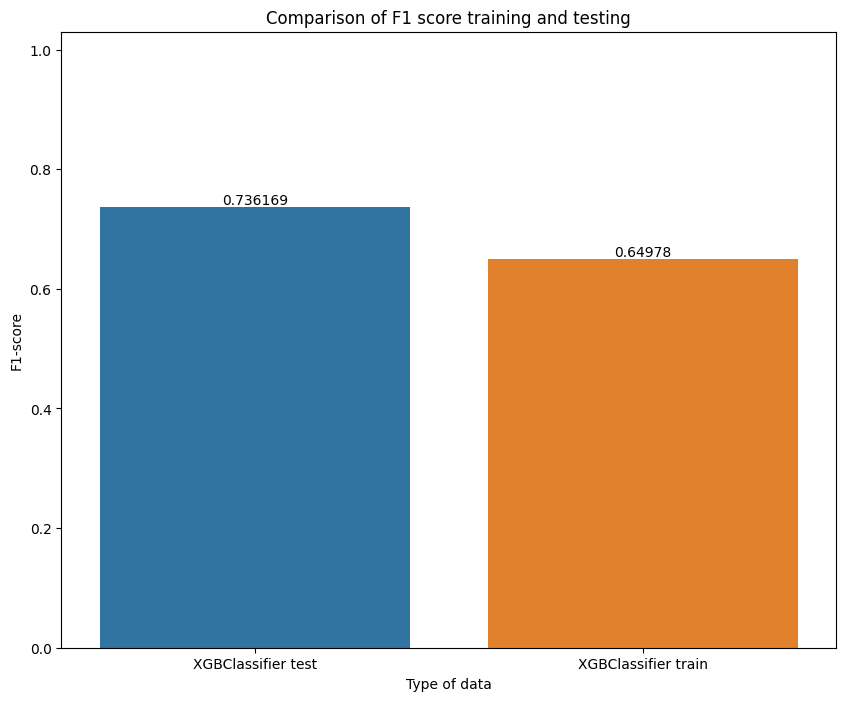

In [219]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(10, 8))
graph = sns.barplot(data=xgb_optimised_df)
for bar in graph.containers:
    graph.bar_label(bar)
plt.title('Comparison of F1 score training and testing')
plt.ylim(0,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used **Random Search CV** for optimization because it reduce computation time compared to exhaustive methods like GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, The performance of model decreased and model became underfitted.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?



*   F1 Score: Balancing precision and recall, the F1 score is particularly useful when both false positives and false negatives carry a significant cost. In email campaigns, this balance can help in effectively targeting customers without overwhelming them with unwanted emails.
*  Precision and Recall: These are crucial for business impact. For instance, a high precision ensures that the users predicted to engage are indeed likely to engage, optimizing resource allocation. High recall ensures most potential engagers are identified, maximizing campaign reach.
* Accuracy: While helpful for understanding overall performance, accuracy can be less informative if the data is imbalanced. In email campaigns, where most emails are ignored, accuracy may be high even for a model that doesn’t perform well on the minority class (e.g., acknowledged emails).


Conclusion:
*   Primary metrics: F1 Score, Precision, Recall.
*   Secondary metrics: Accuracy, ROC AUC.








### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [220]:
final_f1_score_df= pd.DataFrame([{'Random Forest Classifier': f1_rmf_optimised_test, 'Decision Tree Classifier': f1_dt_optimised_test, 'KNN Classifier': f1_knn_optimised_test, 'CatBoost Classifier': f1_cbt_optimised_test, 'XGBClassifier': f1_xgb_optimised_test}])

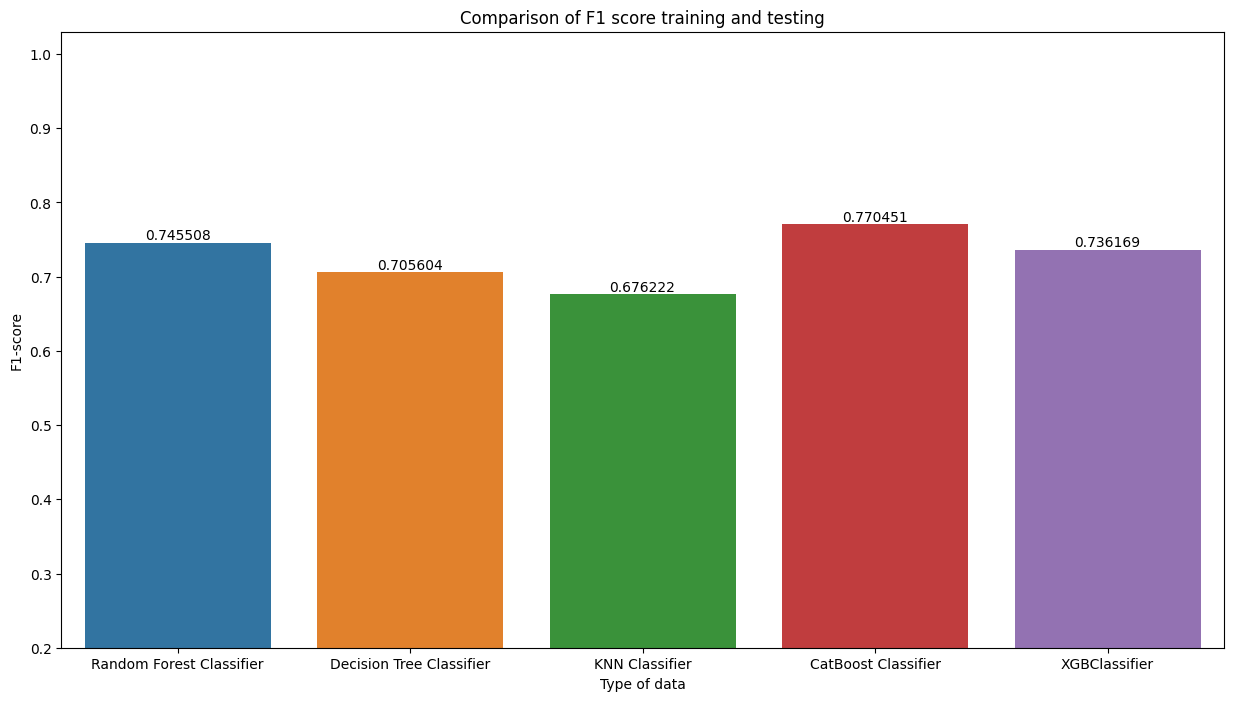

In [233]:
# Set the figure size
plt.figure(figsize=(15, 8))

final_f1_score = sns.barplot(final_f1_score_df)
for bar in final_f1_score.containers:
    final_f1_score.bar_label(bar)

plt.title('Comparison of F1 score training and testing')
plt.ylim(0.2,1.03)
plt.xlabel('Type of data')
plt.ylabel('F1-score')
plt.show()

CatBoost Classifier appears to be the best model due to its balanced performance across multiple metrics. It has the highest F1 Score and Accuracy on the test data, along with competitive Precision, Recall, and ROC AUC scores.








### 3. Explain the model which you have used and the feature importance using any model explainability tool?

CatBoost (Categorical Boosting) is a gradient boosting algorithm. It is particularly known for handling categorical features well and for being efficient in terms of training time and accuracy.

Some key characteristics are :

*  Handling Categorical Features: CatBoost can directly handle categorical features without the need for extensive preprocessing like one-hot encoding.
*   Efficient Training: It employs an ordered boosting process to reduce overfitting and variance.
*   Out-of-the-Box Performance: CatBoost often requires less hyperparameter tuning compared to other gradient boosting algorithms.









In [238]:
cbt_feat_imp= cbt_model.feature_importances_
indices = np.argsort(cbt_feat_imp)[::-1]
features = df.iloc[:,:1].columns

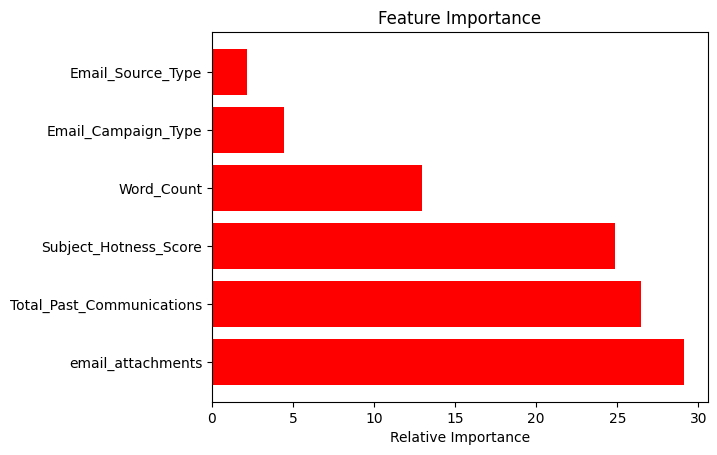

In [240]:
#Visualizing the feature importance
plt.title('Feature Importance')
plt.barh(range(len(indices)), cbt_feat_imp[indices], color='red', align='center')
plt.yticks(range(len(indices)),[ X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [242]:
# Save the fitted model to a file

# loading library
import pickle

with open('cbt_pkl', 'wb') as files:
    pickle.dump(best_cbt_classifier, files)


In [255]:
#Check for taking any 2 values from input
X_test.iloc[51:53,:]

,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Word_Count,email_attachments
15726,0.375337,2,2,0.421875,0.911442,0.703678
11764,0.893145,1,2,0.296875,0.330721,0.253567


In [256]:
#Check for taking any 2 values from output
y_test.iloc[51:53]

15726    0
11764    0
Name: Email_Status, dtype: int64

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [257]:
# Create a sample dataframe with random data
with open('cbt_pkl' , 'rb') as f:
    sv = pickle.load(f)

# check prediction

#Passing all thest values one by one and check for output
print(sv.predict([[0.497763, 2	,2,	0.609375,	0.275862,	0.526671]]))
print(sv.predict([[0.375337	,2	,2, 0.421875,	0.911442,	0.703678]]))

[[0]]
[[0]]


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

* Random_Forest  excellent performance on the training set, with a very high ROC AUC score. However, its performance on the test set indicates potential overfitting, as there's a notable drop in metrics.

* XGBoost and CatBoost perform well on both the test sets, but when tunned their performance decreses making them more reliable choices compared to the Random Forest model, which overfits.

The  model needs improvement. Further this project will help business to :

* **Improve Email Campaign Effectiveness:** By predicting whether an email is likely to be ignored, read, or acknowledged, businesses can optimize their email marketing strategies.

* **Increase Customer Engagement:**  The insights gained from the model can help businesses tailor their email content and delivery to specific customer segments, leading to higher engagement rates.

* **Optimize Resource Allocation:** By focusing on email campaigns that are more likely to be successful, businesses can allocate their resources more efficiently.

* **Enhance ROI:** Improved email campaign effectiveness can lead to increased conversions and ultimately, a higher return on investment.
This project aims to provide a data-driven approach to email marketing, enabling businesses to make informed decisions and achieve better results.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***